<a href="https://colab.research.google.com/github/santyxd3000/Undergraduate-Project/blob/main/Fault_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROYECTO DE GRADO - CLASIFICACIÓN DE FALLAS**

Santiago Pardo Morales - 202013025

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
import datetime
import scipy
sns.set()
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
import io
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn import model_selection
from sklearn.datasets import make_classification
from sklearn.model_selection import ParameterGrid
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from scipy.optimize import curve_fit

In [214]:
ae_df = pd.read_csv('df_with_anomalies_ae1_2.csv',sep=';')
iqr_df = pd.read_csv('statistical_df_with_anomalies.csv',sep=';')
#sensor = pd.read_csv('sensor_data.csv',sep=';').dropna()

In [215]:
#ae_df = pd.merge(ae_df1, sensor, how="inner", on=["Timestamp"])

In [216]:
anomaly_iqr = iqr_df[iqr_df['Anomaly']==1]
no_anomaly_iqr = iqr_df[iqr_df['Anomaly']==0]

In [217]:
anomaly_ae = ae_df[ae_df['Anomaly']==1]
no_anomaly_ae = ae_df[ae_df['Anomaly']==0]

*CORRECCIÓN EVALUACIÓN DE MODELO*

In [218]:
stat_training_anomalies = iqr_df[iqr_df['Timestamp']<'2021-09-03']
stat_testing_anomalies = iqr_df[iqr_df['Timestamp']>'2021-09-03']

In [219]:
ml_training_anomalies = ae_df[ae_df['Timestamp']<'2021-09-03']
ml_testing_anomalies = ae_df[ae_df['Timestamp']>'2021-09-03']

In [220]:
iqr_train = np.array(stat_training_anomalies['Anomaly'])
iqr_test = np.array(stat_testing_anomalies['Anomaly'])
ml_train = np.array(ml_training_anomalies['Anomaly'])
ml_test = np.array(ml_testing_anomalies['Anomaly'])

*ENTRENAMIENTO*

In [221]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


accuracy = accuracy_score(iqr_train, ml_train)
precision = precision_score(iqr_train, ml_train)
f1_score = f1_score(iqr_train, ml_train)
recall = recall_score(iqr_train, ml_train)

print("Precision: "+ str(precision))
print("Accuracy: "+ str(accuracy))
print("F1_Score: "+ str(f1_score))
print("Recall: "+ str(recall))

Precision: 0.6553624417125901
Accuracy: 0.9341621346688055
F1_Score: 0.5794964702942464
Recall: 0.5193729003359463


In [222]:
#Make Confusion Matrix and Evaluate TP, TN, FN, FP
def compute_tp_tn_fn_fp(y_act, y_pred):
    tp = sum((y_act == 1) & (y_pred == 1))
    tn = sum((y_act == 0) & (y_pred == 0))
    fn = sum((y_act == 1) & (y_pred == 0))
    fp = sum((y_act == 0) & (y_pred == 1))
    return tp, tn, fp, fn

tp,tn,fn,fp = compute_tp_tn_fn_fp(iqr_train, ml_train)
print("Number of TP: "+str(tp))
print("Number of TN: "+str(tn))
print("Number of FP: "+str(fp))
print("Number of FN: "+str(fn))

Number of TP: 4638
Number of TN: 90867
Number of FP: 4292
Number of FN: 2439


Text(0.5, 1.0, 'Confusion Matrix for LSTM Autoencoder - Train Data')

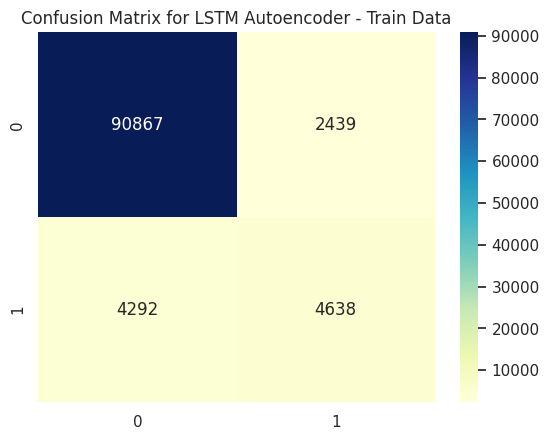

In [223]:
cm_train = confusion_matrix(iqr_train, ml_train)
sns.heatmap(cm_train,annot=True, fmt='g',cmap='YlGnBu')
# Set the axis labels and title
plt.title('Confusion Matrix for LSTM Autoencoder - Train Data')

*PRUEBA*

In [224]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


accuracy = accuracy_score(iqr_test, ml_test)
precision = precision_score(iqr_test, ml_test)
f1_score = f1_score(iqr_test, ml_test)
recall = recall_score(iqr_test, ml_test)

print("Precision: "+ str(precision))
print("Accuracy: "+ str(accuracy))
print("F1_Score: "+ str(f1_score))
print("Recall: "+ str(recall))

Precision: 0.9746096197709101
Accuracy: 0.9772434699555667
F1_Score: 0.9861026577399067
Recall: 0.9978699925578053


In [225]:
tp,tn,fn,fp = compute_tp_tn_fn_fp(iqr_test, ml_test)
print("Number of TP: "+str(tp))
print("Number of TN: "+str(tn))
print("Number of FP: "+str(fp))
print("Number of FN: "+str(fn))

Number of TP: 38884
Number of TN: 8182
Number of FP: 83
Number of FN: 1013


Text(0.5, 1.0, 'Confusion Matrix for LSTM Autoencoder - Test Data')

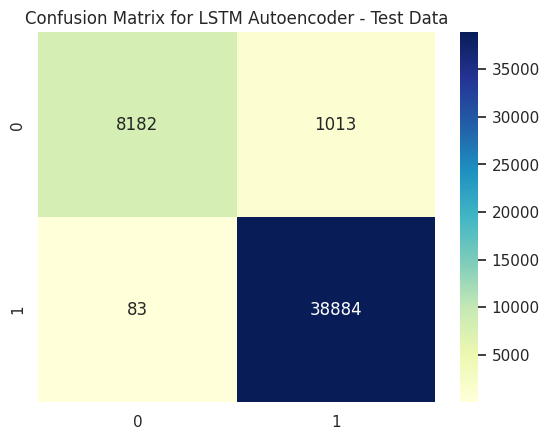

In [226]:
cm_test = confusion_matrix(iqr_test, ml_test)
sns.heatmap(cm_test,annot=True, fmt='g',cmap='YlGnBu')
# Set the axis labels and title
plt.title('Confusion Matrix for LSTM Autoencoder - Test Data')

In [227]:
anomaly_iqr_train = stat_training_anomalies[stat_training_anomalies['Anomaly']==1]
no_anomaly_iqr_train = stat_training_anomalies[stat_training_anomalies['Anomaly']==0]

In [228]:
anomaly_iqr_test = stat_testing_anomalies[stat_testing_anomalies['Anomaly']==1]
no_anomaly_iqr_test = stat_testing_anomalies[stat_testing_anomalies['Anomaly']==0]

In [229]:
anomaly_ae_train = ml_training_anomalies[ml_training_anomalies['Anomaly']==1]
no_anomaly_ae_train = ml_training_anomalies[ml_training_anomalies['Anomaly']==0]

In [230]:
anomaly_ae_test = ml_testing_anomalies[ml_testing_anomalies['Anomaly']==1]
no_anomaly_ae_test = ml_testing_anomalies[ml_testing_anomalies['Anomaly']==0]

## **COMPARACIÓN FINAL CON MÉTODO ESTADÍSTICO**

*Entrenamiento*

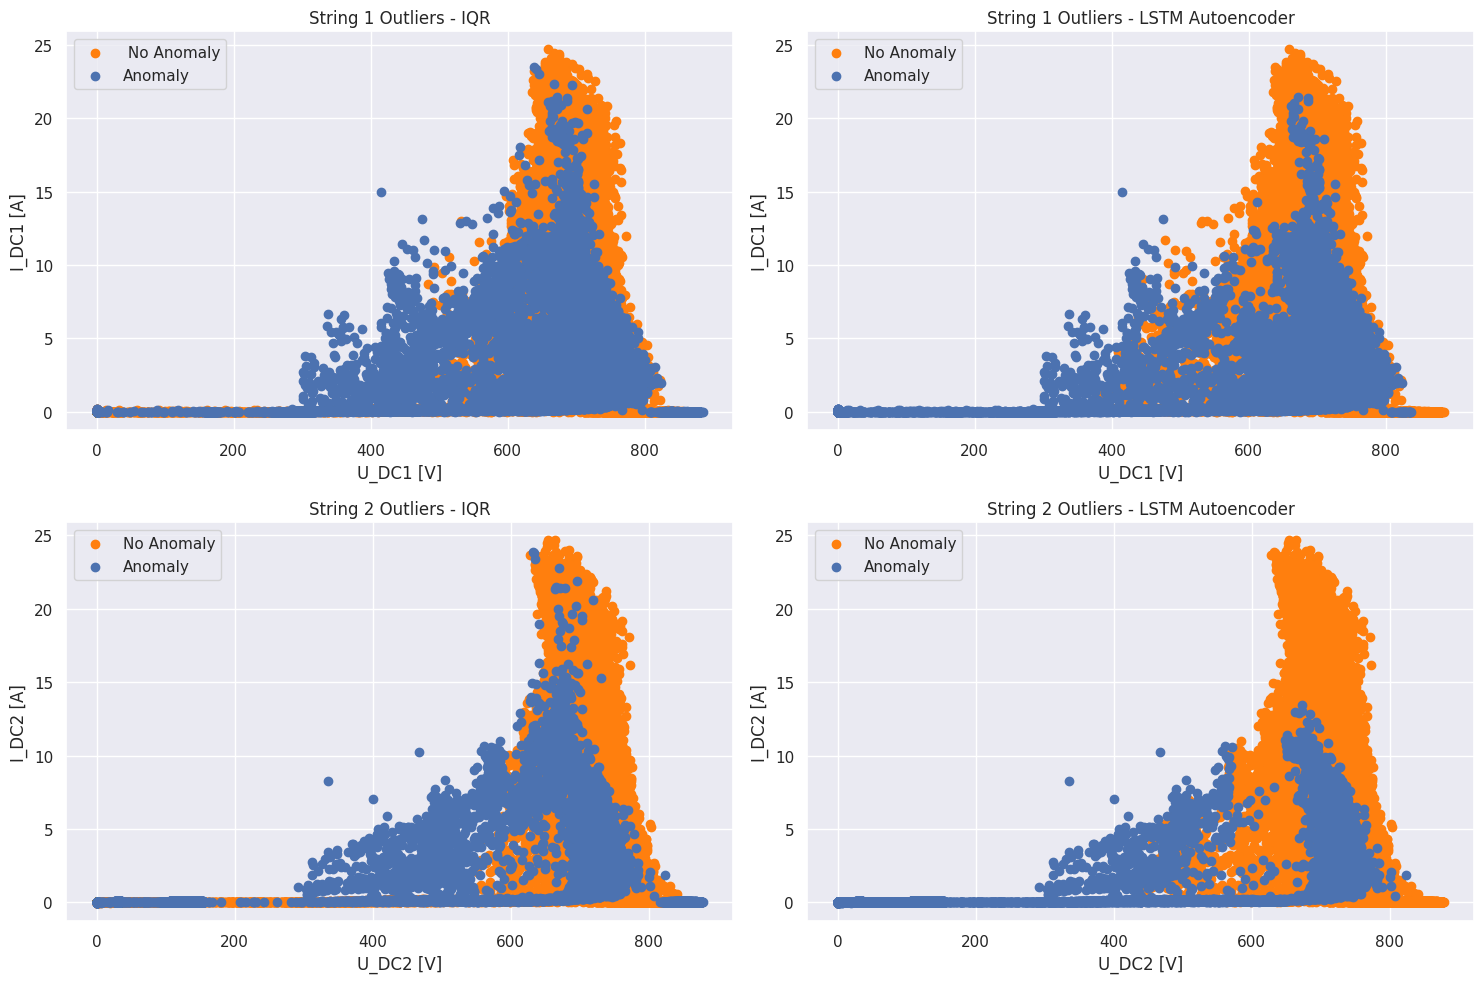

In [231]:
#STRING1

# Gráfico 1
plt.figure(figsize=(15, 10))

# Gráfico 1
plt.subplot(2,2,1)
plt.scatter(no_anomaly_iqr['U_DC1'], no_anomaly_iqr['I_DC1'], label=' No Anomaly',color='tab:orange')
plt.scatter(anomaly_iqr['U_DC1'], anomaly_iqr['I_DC1'], label='Anomaly',color='b')
plt.xlabel('U_DC1 [V]')
plt.ylabel('I_DC1 [A]')
plt.legend()
plt.title('String 1 Outliers - IQR')

# Gráfico 2
plt.subplot(2,2,2)
plt.scatter(no_anomaly_ae['U_DC1'], no_anomaly_ae['I_DC1'], label='No Anomaly',color='#ff7f0e')
plt.scatter(anomaly_ae['U_DC1'], anomaly_ae['I_DC1'], label='Anomaly',color='b')
plt.xlabel('U_DC1 [V]')
plt.ylabel('I_DC1 [A]')
plt.legend()
plt.title('String 1 Outliers - LSTM Autoencoder')

plt.subplot(2,2,3)
plt.scatter(no_anomaly_iqr['U_DC2'], no_anomaly_iqr['I_DC2'], label='No Anomaly',color='#ff7f0e')
plt.scatter(anomaly_iqr['U_DC2'], anomaly_iqr['I_DC2'], label='Anomaly',color='b')
plt.xlabel('U_DC2 [V]')
plt.ylabel('I_DC2 [A]')
plt.legend()
plt.title('String 2 Outliers - IQR')

# Gráfico 2
plt.subplot(2,2,4)
plt.scatter(no_anomaly_ae['U_DC2'], no_anomaly_ae['I_DC2'], label='No Anomaly',color='#ff7f0e')
plt.scatter(anomaly_ae['U_DC2'], anomaly_ae['I_DC2'], label='Anomaly',color='b')
plt.xlabel('U_DC2 [V]')
plt.ylabel('I_DC2 [A]')
plt.legend()
plt.title('String 2 Outliers - LSTM Autoencoder')



# Ajustes de diseño
plt.tight_layout()
plt.show()

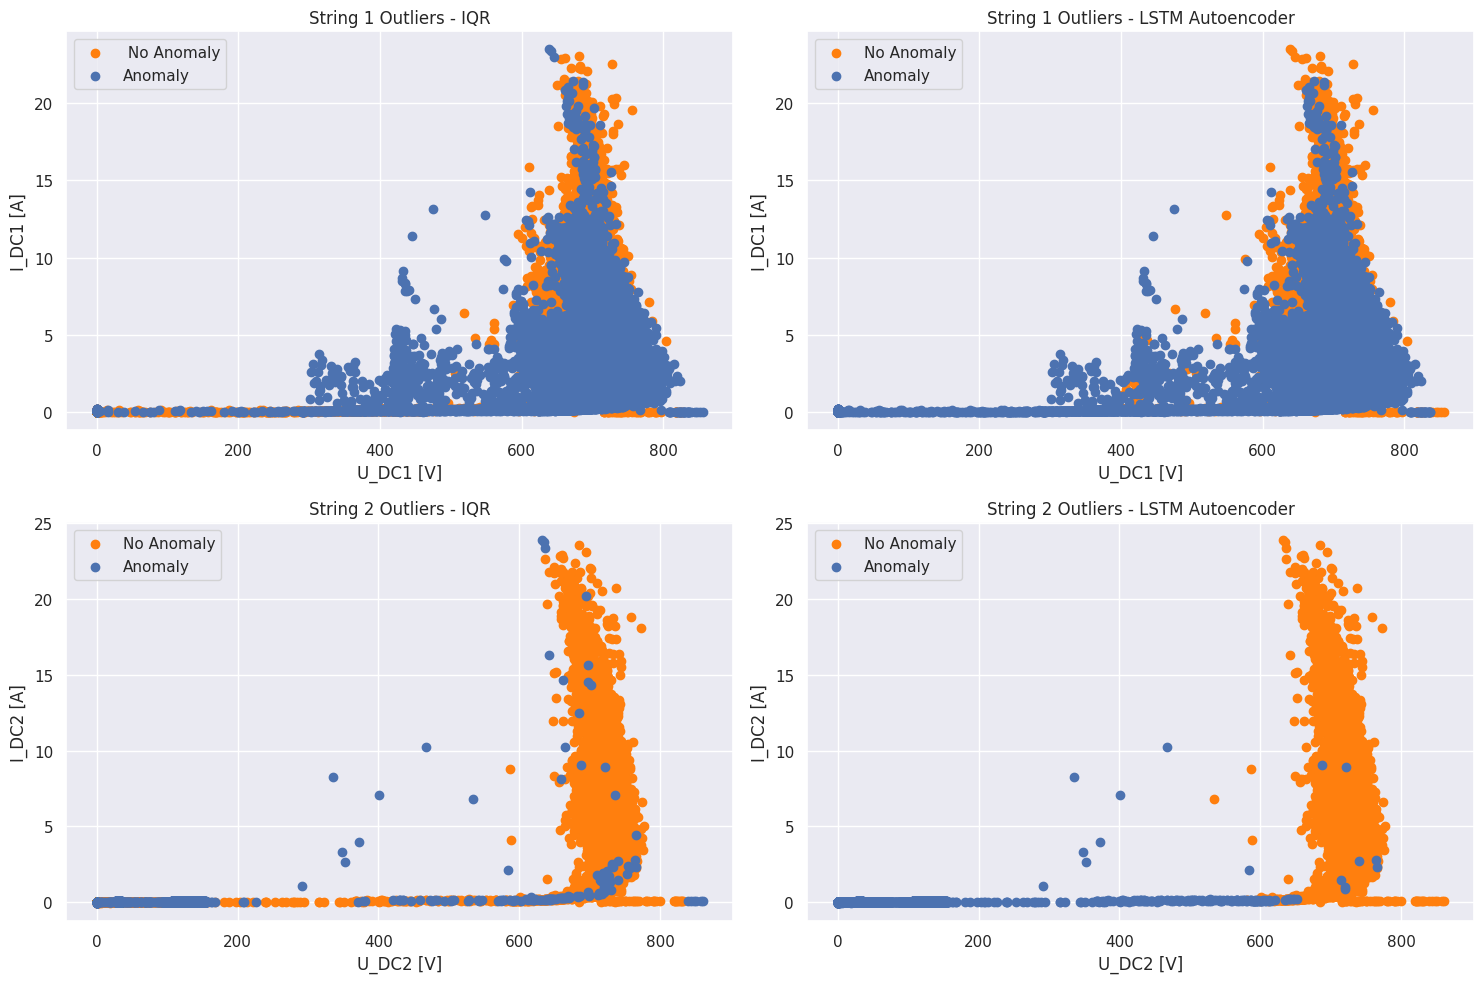

In [232]:
#STRING1

# Gráfico 1
plt.figure(figsize=(15, 10))

# Gráfico 1
plt.subplot(2,2,1)
plt.scatter(no_anomaly_iqr_test['U_DC1'], no_anomaly_iqr_test['I_DC1'], label=' No Anomaly',color='tab:orange')
plt.scatter(anomaly_iqr_test['U_DC1'], anomaly_iqr_test['I_DC1'], label='Anomaly',color='b')
plt.xlabel('U_DC1 [V]')
plt.ylabel('I_DC1 [A]')
plt.legend()
plt.title('String 1 Outliers - IQR')

# Gráfico 2
plt.subplot(2,2,2)
plt.scatter(no_anomaly_ae_test['U_DC1'], no_anomaly_ae_test['I_DC1'], label='No Anomaly',color='#ff7f0e')
plt.scatter(anomaly_ae_test['U_DC1'], anomaly_ae_test['I_DC1'], label='Anomaly',color='b')
plt.xlabel('U_DC1 [V]')
plt.ylabel('I_DC1 [A]')
plt.legend()
plt.title('String 1 Outliers - LSTM Autoencoder')

plt.subplot(2,2,3)
plt.scatter(no_anomaly_iqr_test['U_DC2'], no_anomaly_iqr_test['I_DC2'], label='No Anomaly',color='#ff7f0e')
plt.scatter(anomaly_iqr_test['U_DC2'], anomaly_iqr_test['I_DC2'], label='Anomaly',color='b')
plt.xlabel('U_DC2 [V]')
plt.ylabel('I_DC2 [A]')
plt.legend()
plt.title('String 2 Outliers - IQR')

# Gráfico 2
plt.subplot(2,2,4)
plt.scatter(no_anomaly_ae_test['U_DC2'], no_anomaly_ae_test['I_DC2'], label='No Anomaly',color='#ff7f0e')
plt.scatter(anomaly_ae_test['U_DC2'], anomaly_ae_test['I_DC2'], label='Anomaly',color='b')
plt.xlabel('U_DC2 [V]')
plt.ylabel('I_DC2 [A]')
plt.legend()
plt.title('String 2 Outliers - LSTM Autoencoder')



# Ajustes de diseño
plt.tight_layout()
plt.show()

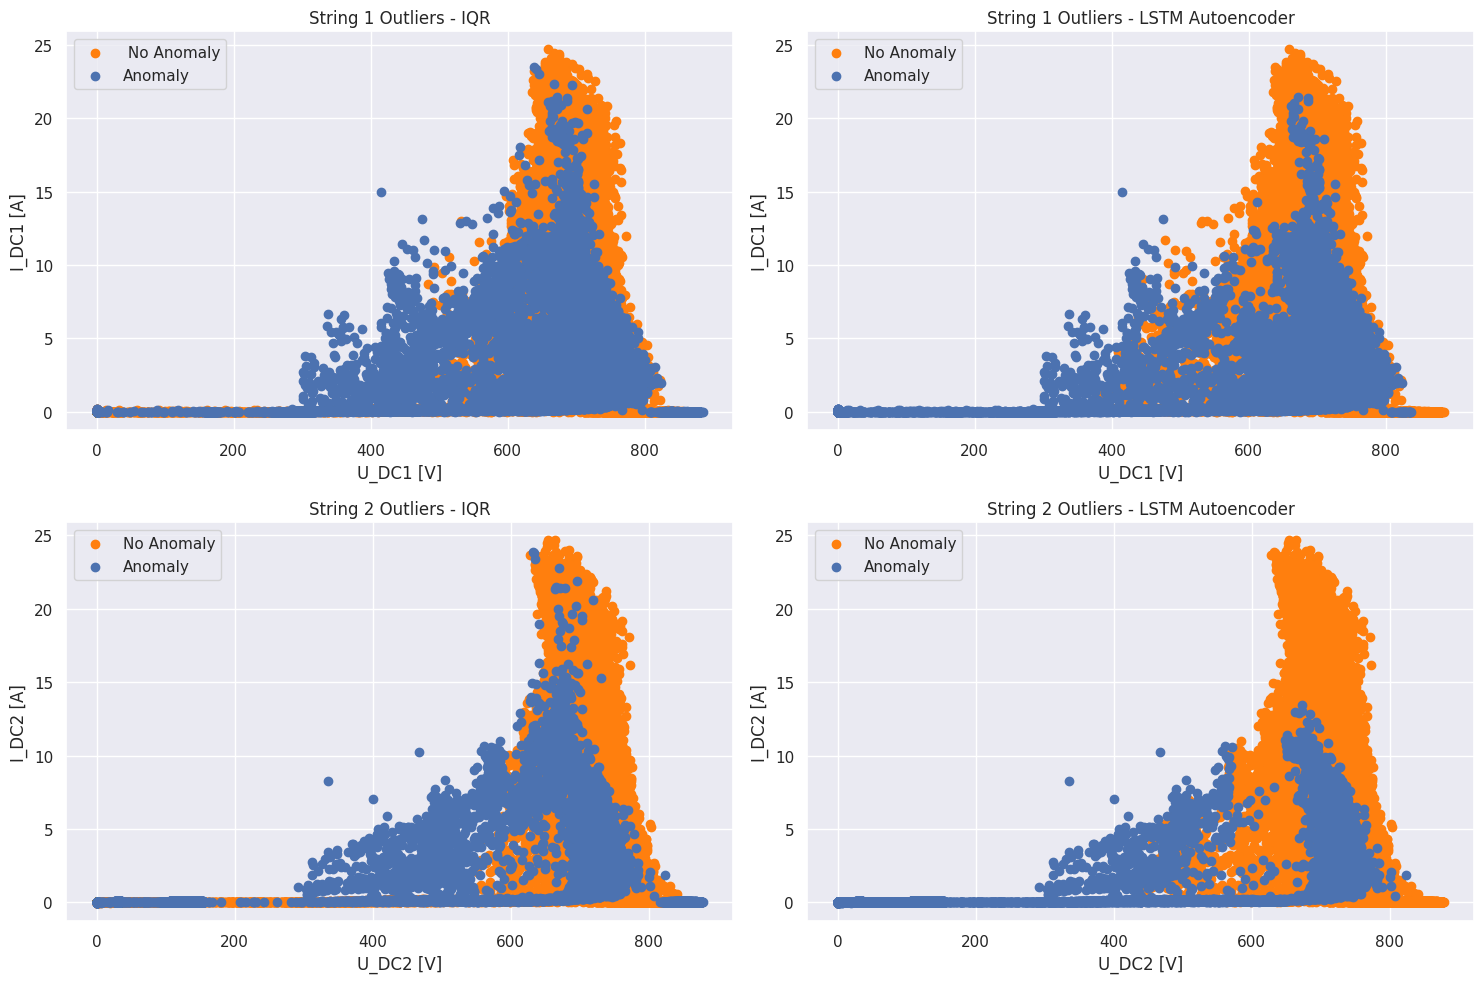

In [233]:
#STRING1

# Gráfico 1
plt.figure(figsize=(15, 10))

# Gráfico 1
plt.subplot(2,2,1)
plt.scatter(no_anomaly_iqr['U_DC1'], no_anomaly_iqr['I_DC1'], label=' No Anomaly',color='tab:orange')
plt.scatter(anomaly_iqr['U_DC1'], anomaly_iqr['I_DC1'], label='Anomaly',color='b')
plt.xlabel('U_DC1 [V]')
plt.ylabel('I_DC1 [A]')
plt.legend()
plt.title('String 1 Outliers - IQR')

# Gráfico 2
plt.subplot(2,2,2)
plt.scatter(no_anomaly_ae['U_DC1'], no_anomaly_ae['I_DC1'], label='No Anomaly',color='#ff7f0e')
plt.scatter(anomaly_ae['U_DC1'], anomaly_ae['I_DC1'], label='Anomaly',color='b')
plt.xlabel('U_DC1 [V]')
plt.ylabel('I_DC1 [A]')
plt.legend()
plt.title('String 1 Outliers - LSTM Autoencoder')

plt.subplot(2,2,3)
plt.scatter(no_anomaly_iqr['U_DC2'], no_anomaly_iqr['I_DC2'], label='No Anomaly',color='#ff7f0e')
plt.scatter(anomaly_iqr['U_DC2'], anomaly_iqr['I_DC2'], label='Anomaly',color='b')
plt.xlabel('U_DC2 [V]')
plt.ylabel('I_DC2 [A]')
plt.legend()
plt.title('String 2 Outliers - IQR')

# Gráfico 2
plt.subplot(2,2,4)
plt.scatter(no_anomaly_ae['U_DC2'], no_anomaly_ae['I_DC2'], label='No Anomaly',color='#ff7f0e')
plt.scatter(anomaly_ae['U_DC2'], anomaly_ae['I_DC2'], label='Anomaly',color='b')
plt.xlabel('U_DC2 [V]')
plt.ylabel('I_DC2 [A]')
plt.legend()
plt.title('String 2 Outliers - LSTM Autoencoder')



# Ajustes de diseño
plt.tight_layout()
plt.show()

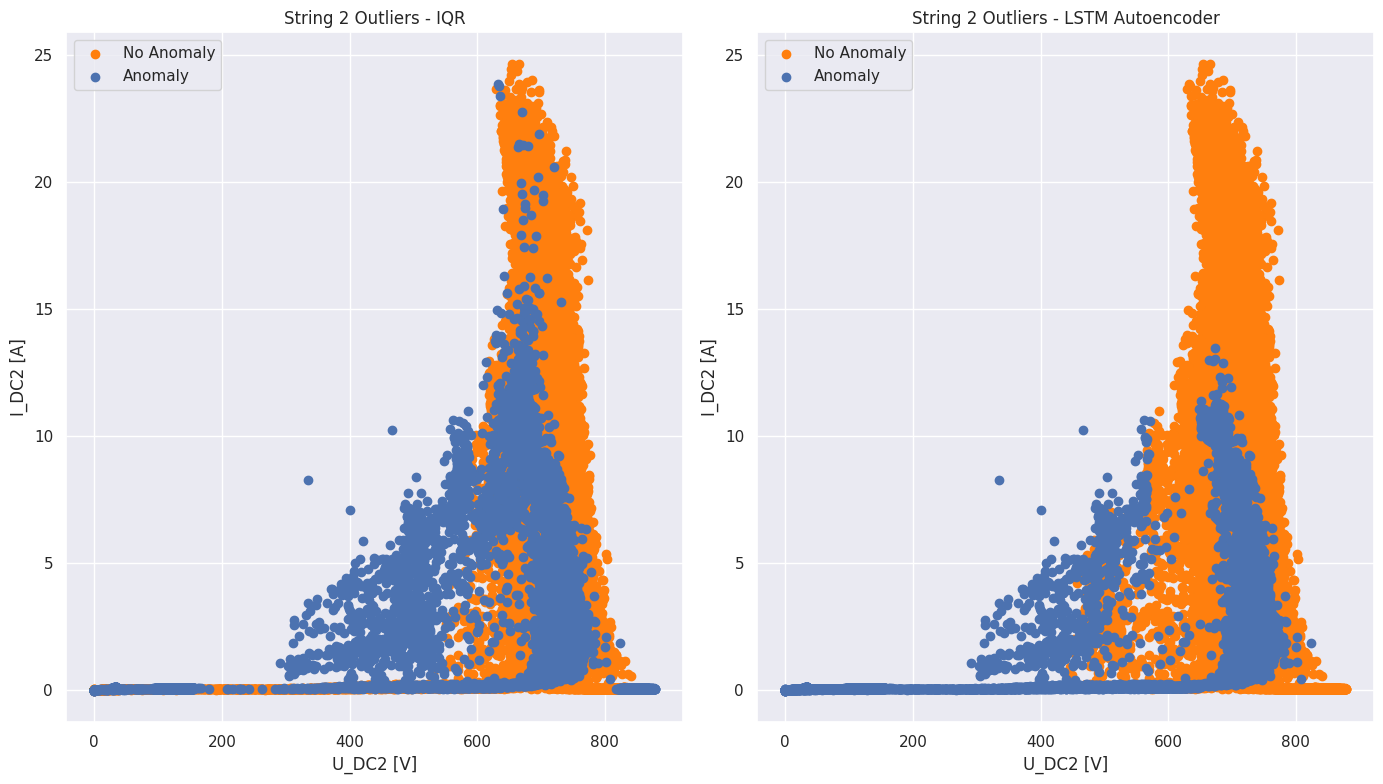

In [234]:
#STRING2

# Gráfico 1
plt.figure(figsize=(14, 8))

# Gráfico 1
plt.subplot(1,2,1)
plt.scatter(no_anomaly_iqr['U_DC2'], no_anomaly_iqr['I_DC2'], label='No Anomaly',color='#ff7f0e')
plt.scatter(anomaly_iqr['U_DC2'], anomaly_iqr['I_DC2'], label='Anomaly',color='b')
plt.xlabel('U_DC2 [V]')
plt.ylabel('I_DC2 [A]')
plt.legend()
plt.title('String 2 Outliers - IQR')

# Gráfico 2
plt.subplot(1,2,2)
plt.scatter(no_anomaly_ae['U_DC2'], no_anomaly_ae['I_DC2'], label='No Anomaly',color='#ff7f0e')
plt.scatter(anomaly_ae['U_DC2'], anomaly_ae['I_DC2'], label='Anomaly',color='b')
plt.xlabel('U_DC2 [V]')
plt.ylabel('I_DC2 [A]')
plt.legend()
plt.title('String 2 Outliers - LSTM Autoencoder')


# Ajustes de diseño
plt.tight_layout()
plt.show()

In [235]:
#Inicializar etiquetas - No fault
ae_df['Label'] = 'No Fault'
ae_df['Anomaly_String1'] = 'No Fault'
ae_df['Anomaly_String2'] = 'No Fault'

In [236]:
ae_df

,Timestamp,U_DC1,U_DC2,I_DC1,I_DC2,Anomaly,Label,Anomaly_String1,Anomaly_String2
0,2019-08-02 16:25:00,777.010,768.710,2.700,2.607,0,No Fault,No Fault,No Fault
1,2019-08-02 16:30:00,761.130,745.964,3.862,3.748,0,No Fault,No Fault,No Fault
2,2019-08-02 16:35:00,736.754,742.908,3.228,3.192,0,No Fault,No Fault,No Fault
3,2019-08-02 16:40:00,731.928,732.224,2.568,2.484,0,No Fault,No Fault,No Fault
4,2019-08-02 16:45:00,723.546,720.698,1.654,1.640,0,No Fault,No Fault,No Fault
...,...,...,...,...,...,...,...,...,...
150393,2023-06-02 10:10:00,712.860,698.410,15.514,15.758,0,No Fault,No Fault,No Fault
150394,2023-06-02 10:15:00,703.810,696.148,16.136,16.278,0,No Fault,No Fault,No Fault
150395,2023-06-02 10:20:00,702.586,466.782,16.520,10.250,1,No Fault,No Fault,No Fault
150396,2023-06-02 10:25:00,703.080,32.316,15.754,0.080,1,No Fault,No Fault,No Fault


## **ENCONTRAR VMP y IMP**

In [237]:
ae_df['P_DC1'] = ae_df['U_DC1']*ae_df['I_DC1']
ae_df['P_DC2'] = ae_df['U_DC2']*ae_df['I_DC2']

In [238]:
ae_df['P_DC1'].idxmax()

9019

In [239]:
ae_df['P_DC2'].idxmax()

9033

In [240]:
v_mp1 = ae_df['U_DC1'].iloc[9019]
i_mp1 = ae_df['I_DC1'].iloc[9019]

In [241]:
v_mp1,i_mp1

(716.312, 23.022)

In [242]:
v_mp2 = ae_df['U_DC2'].iloc[9033]
i_mp2 = ae_df['I_DC2'].iloc[9033]

In [243]:
v_mp2,i_mp2

(685.026, 24.02)

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


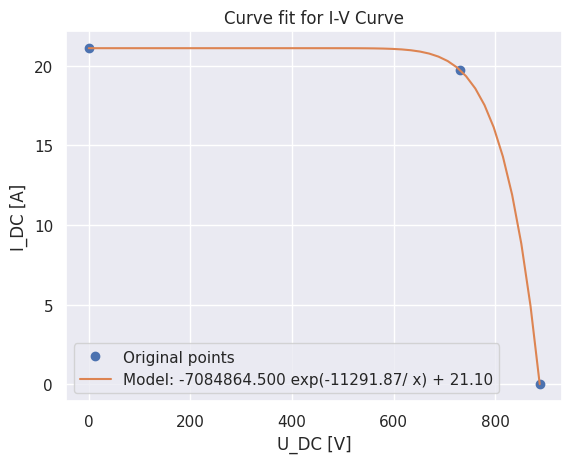

In [244]:
x = np.array([ 0.01,730.8,887.4])
y = np.array([21.1,19.72,0.01])

def fun(x, a, b, c):
    return a*np.exp(b/x)+c

coef,_ = curve_fit(fun, x, y)

plt.plot(x, y, 'o', label='Original points')
plt.xlabel('U_DC [V]')
plt.ylabel('I_DC [A]')
plt.title('Curve fit for I-V Curve')
plt.plot(np.linspace(x[0],x[-1]), fun(np.linspace(x[0],x[-1]), *coef), label=f'Model: %5.3f exp(%4.2f/ x) + %4.2f' % tuple(coef) )
plt.legend()
plt.show()

## STRING 1

<ipython-input-245-ef268199f47f>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(x, y, 'r', color='black')


Text(0.1, 0.85, '1000 W/m^2')

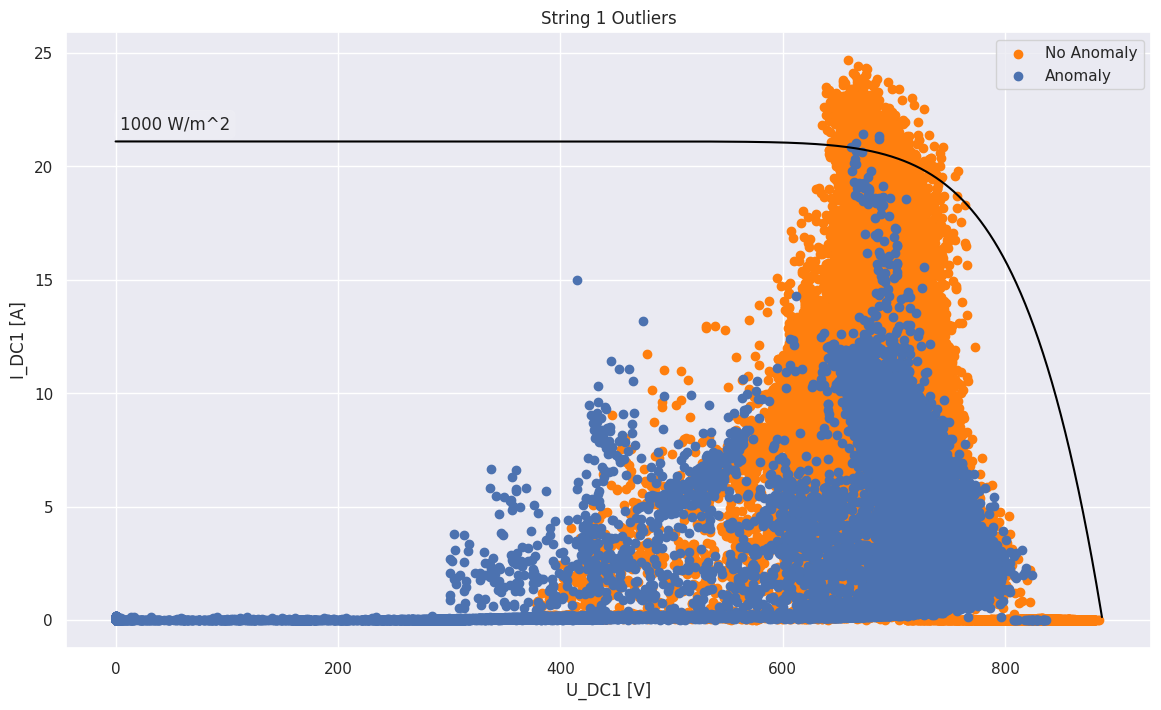

In [245]:
plt.figure(figsize=(14, 8))
x = np.arange(0.01,887.4,1)
y = -7084864.500*np.exp(-11291.87/x)+21.10

plt.plot(x, y, 'r', color='black')
plt.scatter(no_anomaly_ae['U_DC1'], no_anomaly_ae['I_DC1'], label='No Anomaly',color='#ff7f0e')
plt.scatter(anomaly_ae['U_DC1'], anomaly_ae['I_DC1'], label='Anomaly',color='b')
plt.xlabel('U_DC1 [V]')
plt.ylabel('I_DC1 [A]')
plt.legend()
plt.title('String 1 Outliers')

plt.annotate('1000 W/m^2', xy=(0.1, 0.85), xycoords='axes fraction',
             fontsize=12, ha='center', va='center',
             bbox=dict(boxstyle='round', alpha=0.1, facecolor='white'))

In [246]:
ae_df['P_DC1'].mean()

2918.472676096883

In [247]:
ae_df[(ae_df['P_DC1'] >= 2915) & (ae_df['P_DC1'] <= 2920) & (ae_df['I_DC1'] > 6)]

,Timestamp,U_DC1,U_DC2,I_DC1,I_DC2,Anomaly,Label,Anomaly_String1,Anomaly_String2,P_DC1,P_DC2
3519,2019-08-27 16:20:00,476.516,744.416,6.126,1.646,0,No Fault,No Fault,No Fault,2919.137016,1225.308736


In [248]:
ae_df[(ae_df['P_DC1'] >= 2915) & (ae_df['P_DC1'] <= 2920) & (ae_df['U_DC1'] > 400) & (ae_df['U_DC1'] < 500)]

,Timestamp,U_DC1,U_DC2,I_DC1,I_DC2,Anomaly,Label,Anomaly_String1,Anomaly_String2,P_DC1,P_DC2
3519,2019-08-27 16:20:00,476.516,744.416,6.126,1.646,0,No Fault,No Fault,No Fault,2919.137016,1225.308736


In [249]:
ae_df['I_DC1'].mean()

4.134151039242543

In [250]:
ae_df['U_DC1'].mean()

693.9819170002261

### SOMBREO

<ipython-input-251-763ad06fd398>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(x, y, 'r', color='black')
<ipython-input-251-763ad06fd398>:36: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(x_mean_power1_yaxis, y_mean_power1_yaxis, 'r', color='purple')
<ipython-input-251-763ad06fd398>:37: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(x_mean_power1_xaxis, y_mean_power1_xaxis, 'r', color='purple')
<ipython-input-251-763ad06fd398>:38: UserWarning: color i

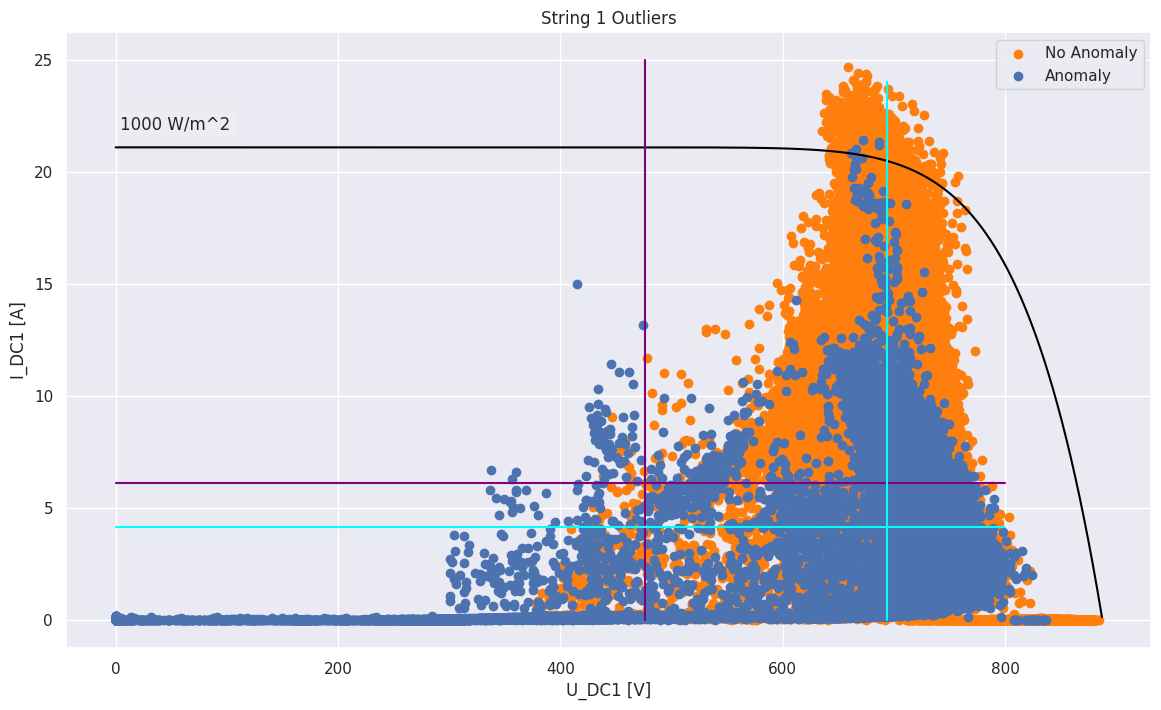

In [251]:
plt.figure(figsize=(14, 8))
x = np.arange(0.01,887.4,1)
y = -7084864.500*np.exp(-11291.87/x)+21.10

plt.plot(x, y, 'r', color='black')
plt.scatter(no_anomaly_ae['U_DC1'], no_anomaly_ae['I_DC1'], label='No Anomaly',color='#ff7f0e')
plt.scatter(anomaly_ae['U_DC1'], anomaly_ae['I_DC1'], label='Anomaly',color='b')
plt.xlabel('U_DC1 [V]')
plt.ylabel('I_DC1 [A]')
plt.legend()
plt.title('String 1 Outliers')

plt.annotate('1000 W/m^2', xy=(0.1, 0.85), xycoords='axes fraction',
             fontsize=12, ha='center', va='center',
             bbox=dict(boxstyle='round', alpha=0.1, facecolor='white'))

x_mean_power1 = 476.516
y_mean_power1 = 6.126

y_mean_power1_yaxis = np.arange(0,26,1)
x_mean_power1_yaxis = x_mean_power1*np.ones(y_mean_power1_yaxis.shape[0])

x_mean_power1_xaxis = np.arange(0,900,100)
y_mean_power1_xaxis = y_mean_power1*np.ones(x_mean_power1_xaxis.shape[0])

x_mean_voltage1 = 693.9819170002261
y_mean_current1 = 4.134151039242543

y_mean_voltage1_axis = np.arange(0,25,1)
x_mean_voltage1_axis = x_mean_voltage1*np.ones(y_mean_voltage1_axis.shape[0])

x_mean_current1_axis = np.arange(0,900,100)
y_mean_current1_axis = y_mean_current1*np.ones(x_mean_current1_axis.shape[0])


plt.plot(x_mean_power1_yaxis, y_mean_power1_yaxis, 'r', color='purple')
plt.plot(x_mean_power1_xaxis, y_mean_power1_xaxis, 'r', color='purple')
plt.plot(x_mean_voltage1_axis, y_mean_voltage1_axis, 'r', color='cyan')
plt.plot(x_mean_current1_axis, y_mean_current1_axis, 'r', color='cyan')

Los datos de sombreo son entonces, aquellos que están en el cuadrante inferior izquierdo y son superiores a 0

In [252]:
shading_power1 = ae_df[(ae_df['Anomaly'] == 1) & (ae_df['I_DC1']>0) & (ae_df['U_DC1']>0) & (ae_df['U_DC1']< x_mean_power1) & (ae_df['I_DC1']< y_mean_power1)]
shading_voltage1 = ae_df[(ae_df['Anomaly'] == 1) & (ae_df['I_DC1']>0) & (ae_df['U_DC1']>0) & (ae_df['U_DC1']< x_mean_voltage1) & (ae_df['I_DC1']< 19.1)]
shading_current1 = ae_df[(ae_df['Anomaly'] == 1) &(ae_df['I_DC1']>0) & (ae_df['U_DC1']>0) & (ae_df['I_DC1']< y_mean_current1) ]

In [253]:
shading_union = shading_power1.index.union(shading_voltage1.index).union(shading_current1.index)

In [254]:
ae_df.loc[shading_union,'Anomaly_String1'] = 'Shading'

In [255]:
ae_df[ae_df['Anomaly_String1'] == 'Shading']

,Timestamp,U_DC1,U_DC2,I_DC1,I_DC2,Anomaly,Label,Anomaly_String1,Anomaly_String2,P_DC1,P_DC2
15,2019-08-03 05:50:00,377.060,366.518,0.032,0.056,1,No Fault,Shading,No Fault,12.065920,20.525008
16,2019-08-03 05:55:00,392.552,511.468,0.056,0.084,1,No Fault,Shading,No Fault,21.982912,42.963312
17,2019-08-03 06:00:00,466.012,595.256,0.090,0.122,1,No Fault,Shading,No Fault,41.941080,72.621232
157,2019-08-04 05:50:00,413.434,556.120,0.050,0.074,1,No Fault,Shading,No Fault,20.671700,41.152880
158,2019-08-04 05:55:00,419.080,599.264,0.104,0.124,1,No Fault,Shading,No Fault,43.584320,74.308736
...,...,...,...,...,...,...,...,...,...,...,...
150199,2023-06-01 05:55:00,407.932,472.558,0.098,0.118,1,No Fault,Shading,No Fault,39.977336,55.761844
150339,2023-06-02 05:40:00,94.104,94.308,0.004,0.010,1,No Fault,Shading,No Fault,0.376416,0.943080
150340,2023-06-02 05:45:00,388.618,418.116,0.038,0.062,1,No Fault,Shading,No Fault,14.767484,25.923192
150341,2023-06-02 05:50:00,381.454,486.948,0.100,0.122,1,No Fault,Shading,No Fault,38.145400,59.407656


### CORTO CIRCUITO

<ipython-input-256-d1228ac7cd2e>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(x, y, 'r', color='black')
<ipython-input-256-d1228ac7cd2e>:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(upper_idc_xaxis, upper_idc_yaxis, 'r', color='purple')
<ipython-input-256-d1228ac7cd2e>:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(lower_idc_xaxis, lower_idc_yaxis, 'r', color='purple')


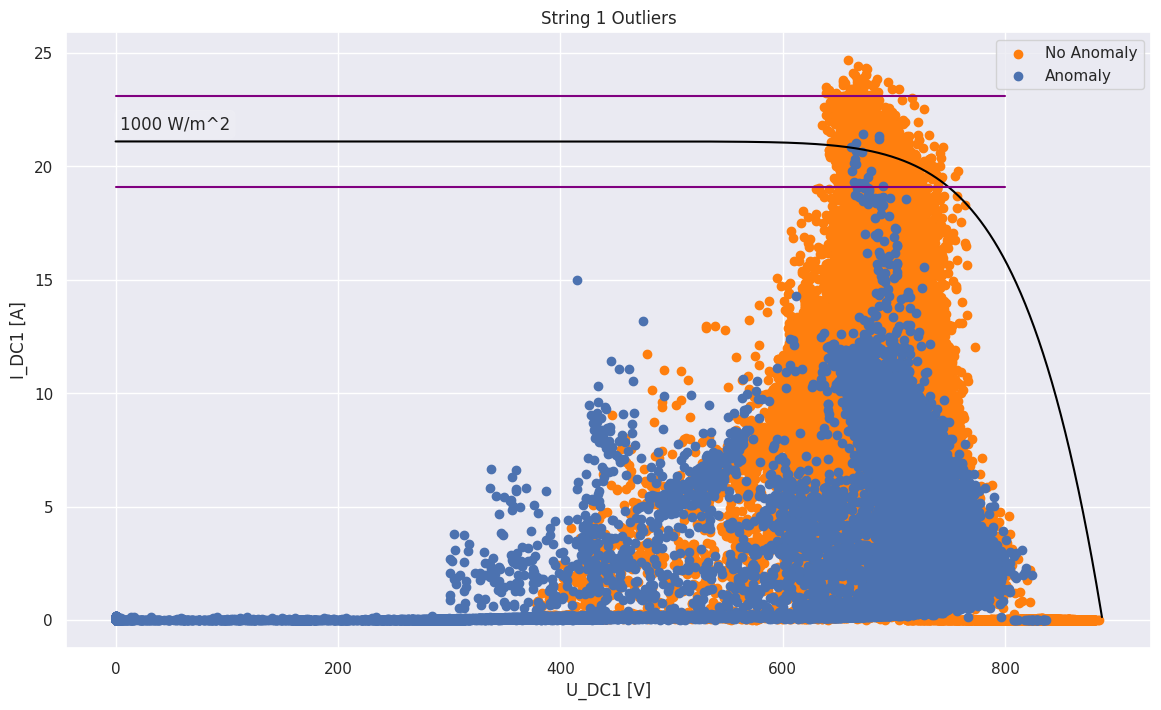

In [256]:
plt.figure(figsize=(14, 8))
x = np.arange(0.01,887.4,1)
y = -7084864.500*np.exp(-11291.87/x)+21.10

plt.plot(x, y, 'r', color='black')
plt.scatter(no_anomaly_ae['U_DC1'], no_anomaly_ae['I_DC1'], label='No Anomaly',color='#ff7f0e')
plt.scatter(anomaly_ae['U_DC1'], anomaly_ae['I_DC1'], label='Anomaly',color='b')
plt.xlabel('U_DC1 [V]')
plt.ylabel('I_DC1 [A]')
plt.legend()
plt.title('String 1 Outliers')

plt.annotate('1000 W/m^2', xy=(0.1, 0.85), xycoords='axes fraction',
             fontsize=12, ha='center', va='center',
             bbox=dict(boxstyle='round', alpha=0.1, facecolor='white'))

upper_limit_idc = 21.1 + 2
lower_limit_idc = 21.1 - 2

upper_idc_xaxis =  np.arange(0,900,100)
upper_idc_yaxis = upper_limit_idc*np.ones(upper_idc_xaxis.shape[0])

lower_idc_xaxis =  np.arange(0,900,100)
lower_idc_yaxis = lower_limit_idc*np.ones(lower_idc_xaxis.shape[0])


plt.plot(upper_idc_xaxis, upper_idc_yaxis, 'r', color='purple')
plt.plot(lower_idc_xaxis, lower_idc_yaxis, 'r', color='purple')

In [257]:
sc_fault1 = ae_df[(ae_df['Anomaly'] == 1) & (ae_df['I_DC1']>=lower_limit_idc) & (ae_df['I_DC1']<=upper_limit_idc)]

In [258]:
index_sc1 = sc_fault1.index

In [259]:
ae_df.loc[index_sc1,'Anomaly_String1'] = 'Short Circuit'

In [260]:
ae_df[ae_df['Anomaly_String1'] == 'Short Circuit']

,Timestamp,U_DC1,U_DC2,I_DC1,I_DC2,Anomaly,Label,Anomaly_String1,Anomaly_String2,P_DC1,P_DC2
146134,2023-05-03 12:00:00,689.886,32.870,19.146,0.086,1,No Fault,Short Circuit,No Fault,13208.557356,2.826820
146136,2023-05-03 12:10:00,676.326,32.888,19.514,0.086,1,No Fault,Short Circuit,No Fault,13197.825564,2.828368
146137,2023-05-03 12:15:00,664.324,31.946,20.136,0.088,1,No Fault,Short Circuit,No Fault,13376.828064,2.811248
146138,2023-05-03 12:20:00,665.762,32.040,20.674,0.090,1,No Fault,Short Circuit,No Fault,13763.963588,2.883600
146139,2023-05-03 12:25:00,661.306,32.418,20.862,0.090,1,No Fault,Short Circuit,No Fault,13796.165772,2.917620
146140,2023-05-03 12:30:00,666.046,32.190,20.122,0.088,1,No Fault,Short Circuit,No Fault,13402.177612,2.832720
146141,2023-05-03 12:35:00,665.570,32.184,21.022,0.090,1,No Fault,Short Circuit,No Fault,13991.612540,2.896560
146145,2023-05-03 12:55:00,686.182,33.526,21.190,0.096,1,No Fault,Short Circuit,No Fault,14540.196580,3.218496
146147,2023-05-03 13:05:00,672.274,32.596,21.444,0.100,1,No Fault,Short Circuit,No Fault,14416.243656,3.259600
146148,2023-05-03 13:10:00,671.534,33.018,20.638,0.098,1,No Fault,Short Circuit,No Fault,13859.118692,3.235764


### CIRCUITO ABIERTO

Todas aquellas fallas cuya corriente sea igual a 0

<ipython-input-261-7868ff17009c>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(x, y, 'r', color='black')
<ipython-input-261-7868ff17009c>:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(voltage_zeros, current, 'r', color='purple')


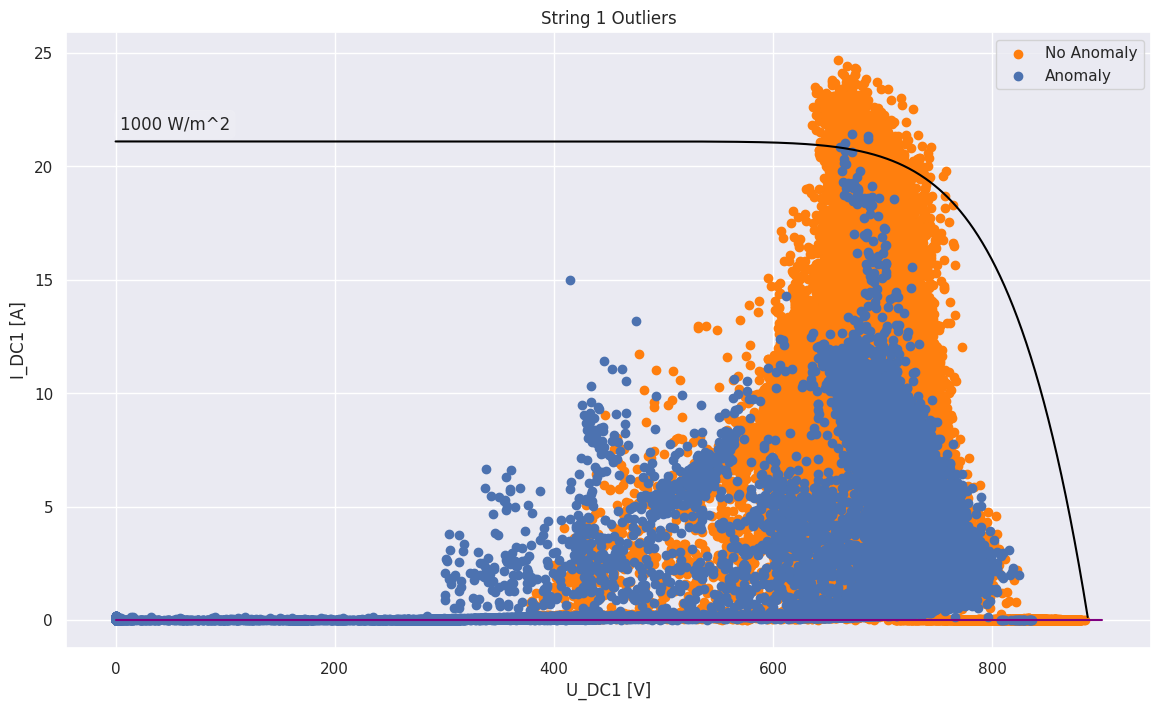

In [261]:
plt.figure(figsize=(14, 8))
x = np.arange(0.01,887.4,1)
y = -7084864.500*np.exp(-11291.87/x)+21.10

plt.plot(x, y, 'r', color='black')
plt.scatter(no_anomaly_ae['U_DC1'], no_anomaly_ae['I_DC1'], label='No Anomaly',color='#ff7f0e')
plt.scatter(anomaly_ae['U_DC1'], anomaly_ae['I_DC1'], label='Anomaly',color='b')
plt.xlabel('U_DC1 [V]')
plt.ylabel('I_DC1 [A]')
plt.legend()
plt.title('String 1 Outliers')

plt.annotate('1000 W/m^2', xy=(0.1, 0.85), xycoords='axes fraction',
             fontsize=12, ha='center', va='center',
             bbox=dict(boxstyle='round', alpha=0.1, facecolor='white'))

current = np.zeros(10)
voltage_zeros = np.arange(0,1000,100)


plt.plot(voltage_zeros, current, 'r', color='purple')

In [262]:
oc_fault1 = ae_df[(ae_df['Anomaly'] == 1) & (ae_df['I_DC1']==0) & (ae_df['U_DC1']!=0) ]

In [263]:
oc_fault1.shape

(994, 11)

In [264]:
index_oc1 = oc_fault1.index

In [265]:
ae_df.loc[index_oc1,'Anomaly_String1'] = 'Open Circuit'

In [266]:
ae_df[(ae_df['Anomaly_String1'] == 'Open Circuit')]

,Timestamp,U_DC1,U_DC2,I_DC1,I_DC2,Anomaly,Label,Anomaly_String1,Anomaly_String2,P_DC1,P_DC2
16543,2019-11-28 05:45:00,1.262,1.270,0.0,0.000,1,No Fault,Open Circuit,No Fault,0.0,0.000000
19660,2019-12-20 06:00:00,0.642,0.646,0.0,0.000,1,No Fault,Open Circuit,No Fault,0.0,0.000000
23701,2020-01-18 06:05:00,0.730,0.734,0.0,0.000,1,No Fault,Open Circuit,No Fault,0.0,0.000000
37189,2020-04-24 05:45:00,1.192,1.198,0.0,0.000,1,No Fault,Open Circuit,No Fault,0.0,0.000000
45305,2020-06-20 05:40:00,0.798,0.802,0.0,0.000,1,No Fault,Open Circuit,No Fault,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
80309,2021-02-24 11:30:00,235.443,781.628,0.0,1.500,1,No Fault,Open Circuit,No Fault,0.0,1172.442000
80310,2021-02-24 11:35:00,262.730,807.900,0.0,0.430,1,No Fault,Open Circuit,No Fault,0.0,347.397000
80311,2021-02-24 11:40:00,266.516,774.634,0.0,2.124,1,No Fault,Open Circuit,No Fault,0.0,1645.322616
80312,2021-02-24 11:45:00,313.516,750.796,0.0,2.024,1,No Fault,Open Circuit,No Fault,0.0,1519.611104


### FALLA NO IDENTIFICADA

<ipython-input-267-222e33a97008>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(x, y, 'r', color='black')
<ipython-input-267-222e33a97008>:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(upper_idc_xaxis, upper_idc_yaxis, 'r', color='purple')


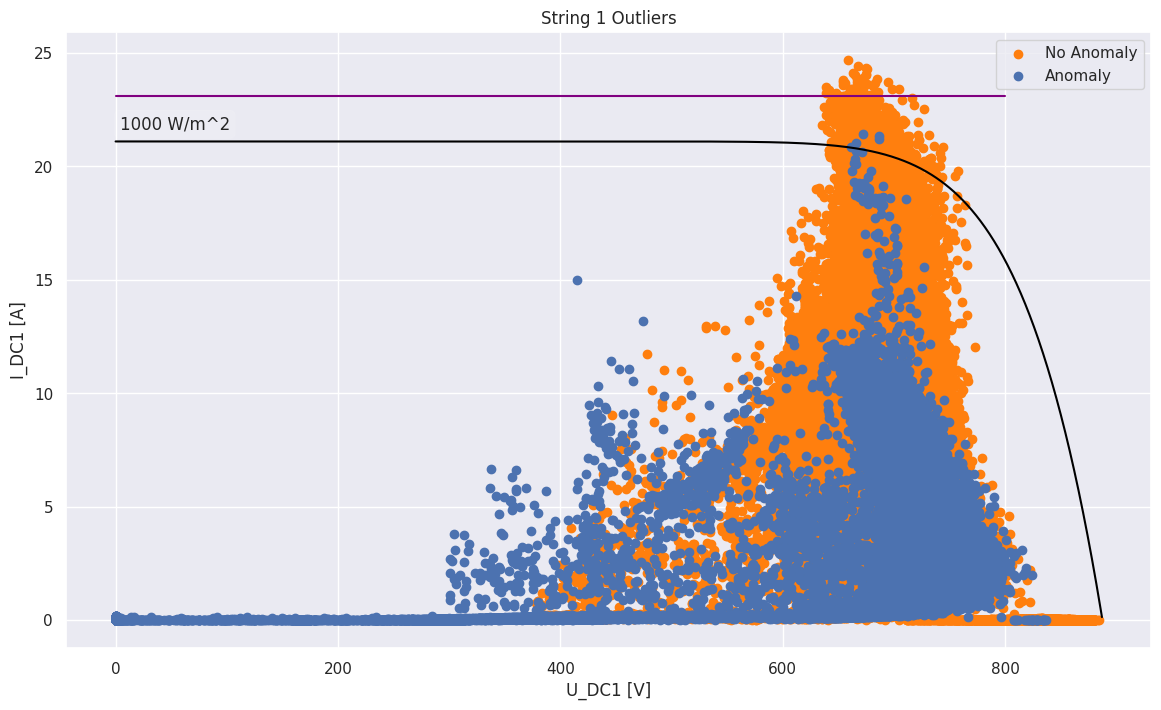

In [267]:
plt.figure(figsize=(14, 8))
x = np.arange(0.01,887.4,1)
y = -7084864.500*np.exp(-11291.87/x)+21.10

plt.plot(x, y, 'r', color='black')
plt.scatter(no_anomaly_ae['U_DC1'], no_anomaly_ae['I_DC1'], label='No Anomaly',color='#ff7f0e')
plt.scatter(anomaly_ae['U_DC1'], anomaly_ae['I_DC1'], label='Anomaly',color='b')
plt.xlabel('U_DC1 [V]')
plt.ylabel('I_DC1 [A]')
plt.legend()
plt.title('String 1 Outliers')

plt.annotate('1000 W/m^2', xy=(0.1, 0.85), xycoords='axes fraction',
             fontsize=12, ha='center', va='center',
             bbox=dict(boxstyle='round', alpha=0.1, facecolor='white'))

upper_limit_idc = 21.1 + 2
lower_limit_idc = 21.1 - 2

upper_idc_xaxis =  np.arange(0,900,100)
upper_idc_yaxis = upper_limit_idc*np.ones(upper_idc_xaxis.shape[0])

lower_idc_xaxis =  np.arange(0,900,100)
lower_idc_yaxis = lower_limit_idc*np.ones(lower_idc_xaxis.shape[0])


plt.plot(upper_idc_xaxis, upper_idc_yaxis, 'r', color='purple')

In [268]:
unknown_1 = ae_df[(ae_df['Anomaly'] == 1) & (ae_df['I_DC1']>=upper_limit_idc)]

In [269]:
index_u1 = unknown_1.index

In [270]:
ae_df.loc[index_u1,'Anomaly_String1'] = 'Unknown'

In [271]:
ae_df[(ae_df['Anomaly_String1'] == 'Unknown')]

,Timestamp,U_DC1,U_DC2,I_DC1,I_DC2,Anomaly,Label,Anomaly_String1,Anomaly_String2,P_DC1,P_DC2


## STRING 2

<ipython-input-272-c37a9240a5b8>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(x, y, 'r', color='black')


Text(0.1, 0.85, '1000 W/m^2')

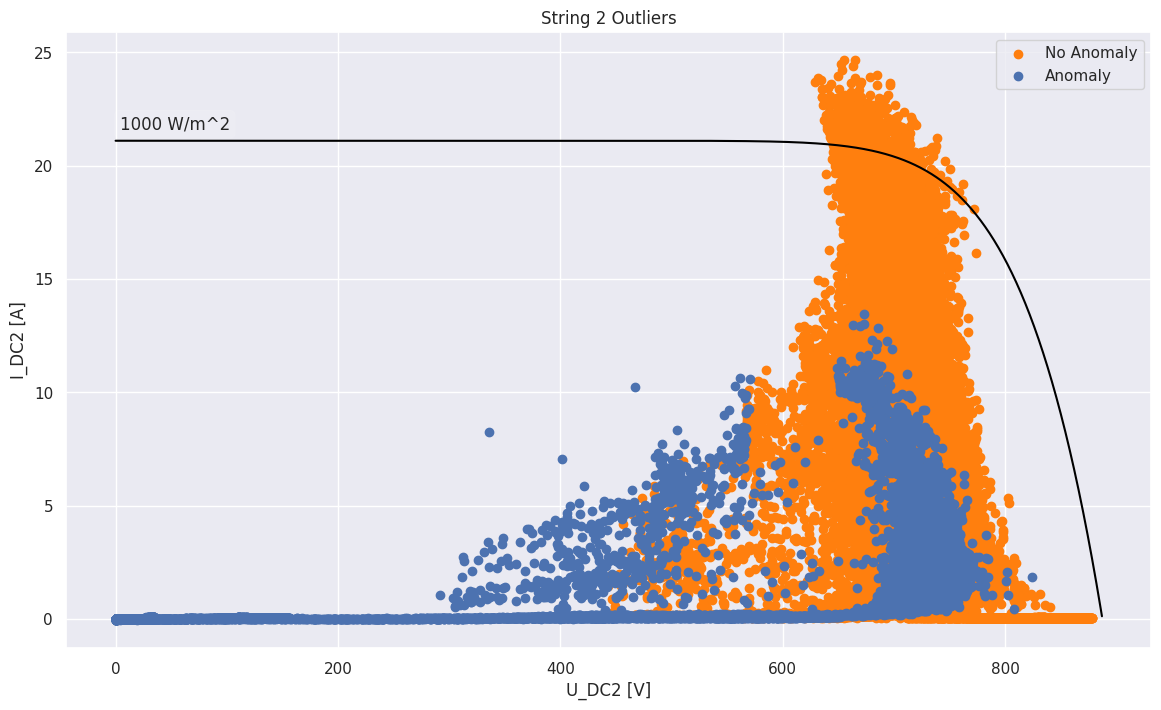

In [272]:
plt.figure(figsize=(14, 8))
x = np.arange(0.01,887.4,1)
y = -7084864.500*np.exp(-11291.87/x)+21.10

plt.plot(x, y, 'r', color='black')
plt.scatter(no_anomaly_ae['U_DC2'], no_anomaly_ae['I_DC2'], label='No Anomaly',color='#ff7f0e')
plt.scatter(anomaly_ae['U_DC2'], anomaly_ae['I_DC2'], label='Anomaly',color='b')
plt.xlabel('U_DC2 [V]')
plt.ylabel('I_DC2 [A]')
plt.legend()
plt.title('String 2 Outliers')

plt.annotate('1000 W/m^2', xy=(0.1, 0.85), xycoords='axes fraction',
             fontsize=12, ha='center', va='center',
             bbox=dict(boxstyle='round', alpha=0.1, facecolor='white'))

In [273]:
ae_df['P_DC2'].mean()

2091.0071947071306

In [274]:
ae_df[(ae_df['P_DC2'] >= 2000) & (ae_df['P_DC2'] <= 2100) & (ae_df['I_DC2'] >= 4.5)]

,Timestamp,U_DC1,U_DC2,I_DC1,I_DC2,Anomaly,Label,Anomaly_String1,Anomaly_String2,P_DC1,P_DC2
5661,2019-09-12 16:00:00,725.734,454.512,5.222,4.508,1,No Fault,No Fault,No Fault,3789.782948,2048.940096
21607,2020-01-02 16:55:00,731.206,408.542,3.580,4.972,1,No Fault,Shading,No Fault,2617.717480,2031.270824
22445,2020-01-08 16:50:00,474.460,445.506,3.944,4.574,1,No Fault,Shading,No Fault,1871.270240,2037.744444
25625,2020-01-31 17:05:00,711.352,428.612,3.298,4.764,1,No Fault,Shading,No Fault,2346.038896,2041.907568


In [275]:
2091.0071947071306 - 2048.940096

42.067098707130754

In [276]:
2091.0071947071306 - 2121.659808

-30.65261329286932

In [277]:
ae_df[(ae_df['P_DC2'] >= 2100) & (ae_df['P_DC2'] <= 2150) & (ae_df['I_DC2'] >= 4.5)]

,Timestamp,U_DC1,U_DC2,I_DC1,I_DC2,Anomaly,Label,Anomaly_String1,Anomaly_String2,P_DC1,P_DC2
17098,2019-12-01 16:30:00,707.556,453.718,2.912,4.722,1,No Fault,Shading,No Fault,2060.403072,2142.456396
21606,2020-01-02 16:50:00,692.314,416.782,3.946,5.140,1,No Fault,Shading,No Fault,2731.871044,2142.259480
22723,2020-01-10 16:50:00,690.474,454.018,2.960,4.676,1,No Fault,Shading,No Fault,2043.803040,2122.988168
27276,2020-02-12 17:00:00,700.986,458.044,2.692,4.632,1,No Fault,Shading,No Fault,1887.054312,2121.659808


In [278]:
ae_df['I_DC2'].mean()

2.9501705940238563

In [279]:
ae_df['U_DC2'].mean()

554.7488825117355

### SOMBREO

<ipython-input-280-808cd0826456>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(x, y, 'r', color='black')
<ipython-input-280-808cd0826456>:35: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(x_mean_power1_yaxis, y_mean_power1_yaxis, 'r', color='purple')
<ipython-input-280-808cd0826456>:36: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(x_mean_power1_xaxis, y_mean_power1_xaxis, 'r', color='purple')
<ipython-input-280-808cd0826456>:37: UserWarning: color i

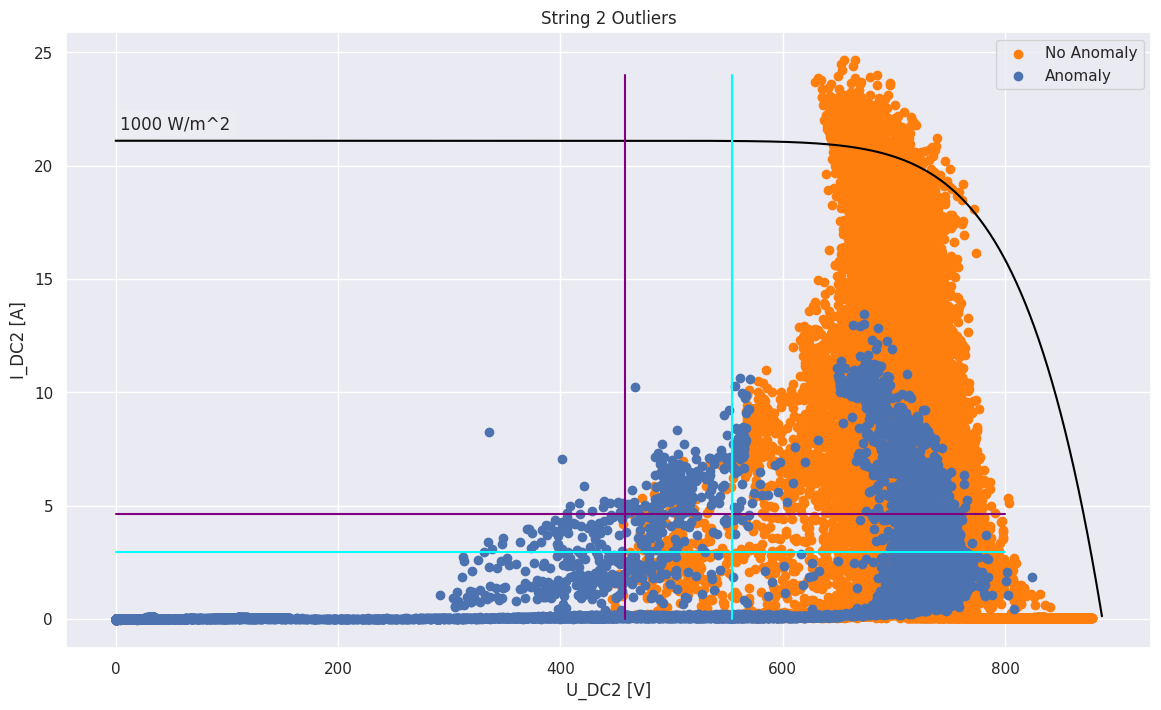

In [280]:
plt.figure(figsize=(14, 8))
x = np.arange(0.01,887.4,1)
y = -7084864.500*np.exp(-11291.87/x)+21.10

plt.plot(x, y, 'r', color='black')
plt.scatter(no_anomaly_ae['U_DC2'], no_anomaly_ae['I_DC2'], label='No Anomaly',color='#ff7f0e')
plt.scatter(anomaly_ae['U_DC2'], anomaly_ae['I_DC2'], label='Anomaly',color='b')
plt.xlabel('U_DC2 [V]')
plt.ylabel('I_DC2 [A]')
plt.legend()
plt.title('String 2 Outliers')

plt.annotate('1000 W/m^2', xy=(0.1, 0.85), xycoords='axes fraction',
             fontsize=12, ha='center', va='center',
             bbox=dict(boxstyle='round', alpha=0.1, facecolor='white'))

x_mean_power1 = 458.044
y_mean_power1 = 4.632

y_mean_power1_yaxis = np.arange(0,25,1)
x_mean_power1_yaxis = x_mean_power1*np.ones(y_mean_power1_yaxis.shape[0])

x_mean_power1_xaxis = np.arange(0,900,100)
y_mean_power1_xaxis = y_mean_power1*np.ones(x_mean_power1_xaxis.shape[0])

x_mean_voltage1 = 554.7488825117355
y_mean_current1 = 2.9501705940238563

y_mean_voltage1_axis = np.arange(0,25,1)
x_mean_voltage1_axis = x_mean_voltage1*np.ones(y_mean_voltage1_axis.shape[0])

x_mean_current1_axis = np.arange(0,900,100)
y_mean_current1_axis = y_mean_current1*np.ones(x_mean_current1_axis.shape[0])

plt.plot(x_mean_power1_yaxis, y_mean_power1_yaxis, 'r', color='purple')
plt.plot(x_mean_power1_xaxis, y_mean_power1_xaxis, 'r', color='purple')
plt.plot(x_mean_voltage1_axis, y_mean_voltage1_axis, 'r', color='cyan')
plt.plot(x_mean_current1_axis, y_mean_current1_axis, 'r', color='cyan')

In [281]:
shading_power2 = ae_df[(ae_df['Anomaly'] == 1) & (ae_df['I_DC2']> 0) & (ae_df['U_DC2']> 0) & (ae_df['U_DC2']< x_mean_power1) & (ae_df['I_DC2']< y_mean_power1)]
shading_voltage2 = ae_df[(ae_df['Anomaly'] == 1) & (ae_df['I_DC2']>0) & (ae_df['U_DC1']>0) & (ae_df['U_DC2']< x_mean_voltage1) & (ae_df['I_DC2']< 19.1)]
shading_current2 = ae_df[(ae_df['Anomaly'] == 1) &(ae_df['I_DC2']>0) & (ae_df['U_DC2']>0) & (ae_df['I_DC2']< y_mean_current1) ]

In [282]:
shading_union = shading_power2.index.union(shading_voltage2.index).union(shading_current2.index)

In [283]:
ae_df.loc[shading_union,'Anomaly_String2'] = 'Shading'

In [284]:
ae_df[ae_df['Anomaly_String2'] == 'Shading']

,Timestamp,U_DC1,U_DC2,I_DC1,I_DC2,Anomaly,Label,Anomaly_String1,Anomaly_String2,P_DC1,P_DC2
15,2019-08-03 05:50:00,377.060,366.518,0.032,0.056,1,No Fault,Shading,Shading,12.065920,20.525008
16,2019-08-03 05:55:00,392.552,511.468,0.056,0.084,1,No Fault,Shading,Shading,21.982912,42.963312
17,2019-08-03 06:00:00,466.012,595.256,0.090,0.122,1,No Fault,Shading,Shading,41.941080,72.621232
157,2019-08-04 05:50:00,413.434,556.120,0.050,0.074,1,No Fault,Shading,Shading,20.671700,41.152880
158,2019-08-04 05:55:00,419.080,599.264,0.104,0.124,1,No Fault,Shading,Shading,43.584320,74.308736
...,...,...,...,...,...,...,...,...,...,...,...
150340,2023-06-02 05:45:00,388.618,418.116,0.038,0.062,1,No Fault,Shading,Shading,14.767484,25.923192
150341,2023-06-02 05:50:00,381.454,486.948,0.100,0.122,1,No Fault,Shading,Shading,38.145400,59.407656
150395,2023-06-02 10:20:00,702.586,466.782,16.520,10.250,1,No Fault,No Fault,Shading,11606.720720,4784.515500
150396,2023-06-02 10:25:00,703.080,32.316,15.754,0.080,1,No Fault,No Fault,Shading,11076.322320,2.585280


### CORTO CIRCUITO

<ipython-input-285-3dde8b8c8385>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(x, y, 'r', color='black')
<ipython-input-285-3dde8b8c8385>:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(upper_idc_xaxis, upper_idc_yaxis, 'r', color='purple')
<ipython-input-285-3dde8b8c8385>:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(lower_idc_xaxis, lower_idc_yaxis, 'r', color='purple')


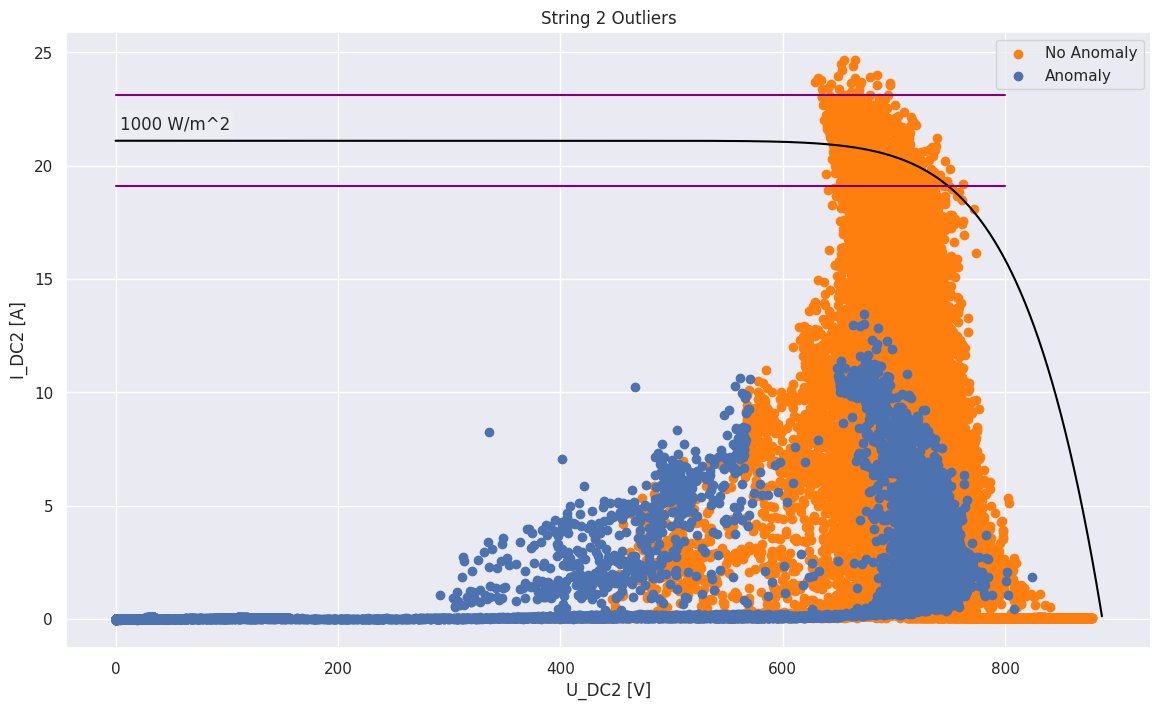

In [285]:
plt.figure(figsize=(14, 8))
x = np.arange(0.01,887.4,1)
y = -7084864.500*np.exp(-11291.87/x)+21.10

plt.plot(x, y, 'r', color='black')
plt.scatter(no_anomaly_ae['U_DC2'], no_anomaly_ae['I_DC2'], label='No Anomaly',color='#ff7f0e')
plt.scatter(anomaly_ae['U_DC2'], anomaly_ae['I_DC2'], label='Anomaly',color='b')
plt.xlabel('U_DC2 [V]')
plt.ylabel('I_DC2 [A]')
plt.legend()
plt.title('String 2 Outliers')

plt.annotate('1000 W/m^2', xy=(0.1, 0.85), xycoords='axes fraction',
             fontsize=12, ha='center', va='center',
             bbox=dict(boxstyle='round', alpha=0.1, facecolor='white'))

upper_limit_idc = 21.1 + 2
lower_limit_idc = 21.1 - 2

upper_idc_xaxis =  np.arange(0,900,100)
upper_idc_yaxis = upper_limit_idc*np.ones(upper_idc_xaxis.shape[0])

lower_idc_xaxis =  np.arange(0,900,100)
lower_idc_yaxis = lower_limit_idc*np.ones(lower_idc_xaxis.shape[0])


plt.plot(upper_idc_xaxis, upper_idc_yaxis, 'r', color='purple')
plt.plot(lower_idc_xaxis, lower_idc_yaxis, 'r', color='purple')

In [286]:
sc_fault2 = ae_df[(ae_df['Anomaly'] == 1) & (ae_df['I_DC2']>=lower_limit_idc) & (ae_df['I_DC2']<=upper_limit_idc)]

In [287]:
sc_fault2.shape

(0, 11)

In [288]:
index_sc2 = sc_fault2.index

In [289]:
ae_df.loc[index_sc2,'Anomaly_String2'] = 'Short Circuit'

In [290]:
ae_df[ae_df['Anomaly_String2'] == 'Short Circuit']

,Timestamp,U_DC1,U_DC2,I_DC1,I_DC2,Anomaly,Label,Anomaly_String1,Anomaly_String2,P_DC1,P_DC2


No hay fallas de corto circuito

### CIRCUITO ABIERTO

Todas aquellas fallas cuya corriente sea igual a 0

<ipython-input-291-79cc9354f321>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(x, y, 'r', color='black')
<ipython-input-291-79cc9354f321>:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(voltage_zeros, current, 'r', color='purple')


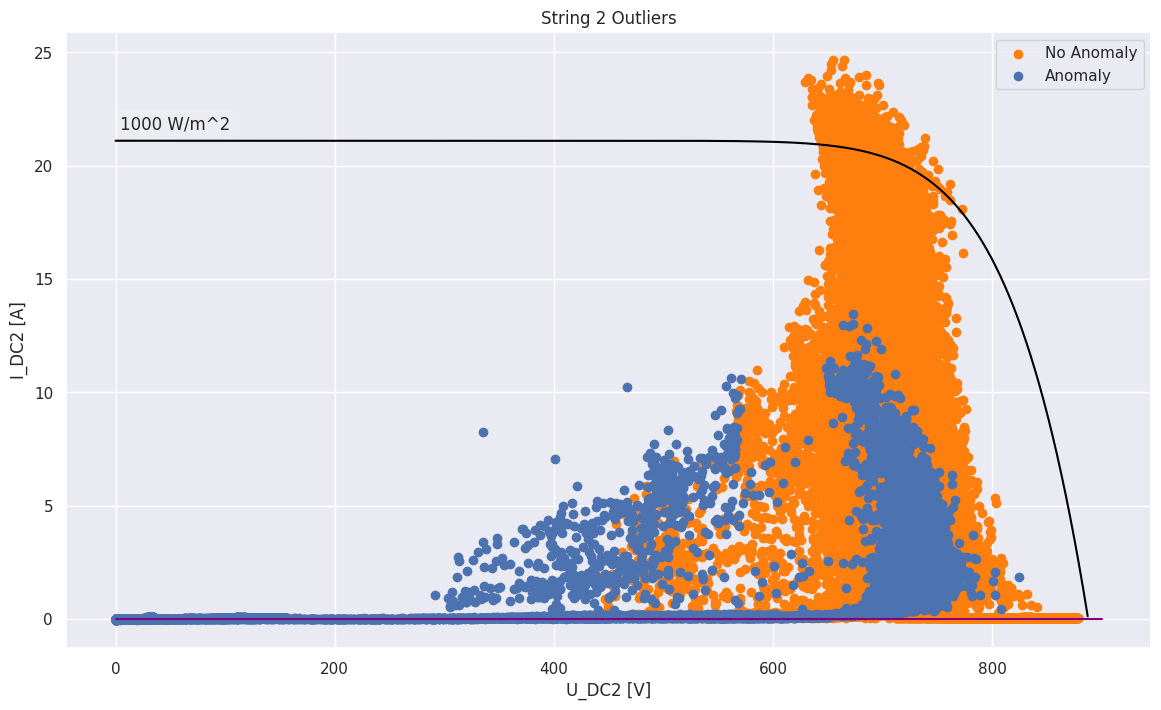

In [291]:
plt.figure(figsize=(14, 8))
x = np.arange(0.01,887.4,1)
y = -7084864.500*np.exp(-11291.87/x)+21.10

plt.plot(x, y, 'r', color='black')
plt.scatter(no_anomaly_ae['U_DC2'], no_anomaly_ae['I_DC2'], label='No Anomaly',color='#ff7f0e')
plt.scatter(anomaly_ae['U_DC2'], anomaly_ae['I_DC2'], label='Anomaly',color='b')
plt.xlabel('U_DC2 [V]')
plt.ylabel('I_DC2 [A]')
plt.legend()
plt.title('String 2 Outliers')

plt.annotate('1000 W/m^2', xy=(0.1, 0.85), xycoords='axes fraction',
             fontsize=12, ha='center', va='center',
             bbox=dict(boxstyle='round', alpha=0.1, facecolor='white'))

current = np.zeros(10)
voltage_zeros = np.arange(0,1000,100)


plt.plot(voltage_zeros, current, 'r', color='purple')

In [292]:
oc_fault2 = ae_df[(ae_df['Anomaly'] == 1) & (ae_df['I_DC2']==0) & (ae_df['U_DC2']!=0)]

In [293]:
oc_fault2.shape

(14, 11)

In [294]:
index_oc2 = oc_fault2.index

In [295]:
ae_df.loc[index_oc2,'Anomaly_String2'] = 'Open Circuit'

In [296]:
ae_df[(ae_df['Anomaly_String2'] == 'Open Circuit')]

,Timestamp,U_DC1,U_DC2,I_DC1,I_DC2,Anomaly,Label,Anomaly_String1,Anomaly_String2,P_DC1,P_DC2
16543,2019-11-28 05:45:00,1.262,1.270,0.000,0.0,1,No Fault,Open Circuit,Open Circuit,0.000000,0.0
19660,2019-12-20 06:00:00,0.642,0.646,0.000,0.0,1,No Fault,Open Circuit,Open Circuit,0.000000,0.0
23701,2020-01-18 06:05:00,0.730,0.734,0.000,0.0,1,No Fault,Open Circuit,Open Circuit,0.000000,0.0
37189,2020-04-24 05:45:00,1.192,1.198,0.000,0.0,1,No Fault,Open Circuit,Open Circuit,0.000000,0.0
45305,2020-06-20 05:40:00,0.798,0.802,0.000,0.0,1,No Fault,Open Circuit,Open Circuit,0.000000,0.0
47719,2020-07-07 05:50:00,1.000,1.006,0.000,0.0,1,No Fault,Open Circuit,Open Circuit,0.000000,0.0
61567,2020-10-13 05:50:00,1.414,1.420,0.000,0.0,1,No Fault,Open Circuit,Open Circuit,0.000000,0.0
91943,2021-05-19 05:45:00,128.377,128.560,0.058,0.0,1,No Fault,Shading,Open Circuit,7.445866,0.0
119906,2022-04-01 06:00:00,59.167,11.820,0.094,0.0,1,No Fault,Shading,Open Circuit,5.561698,0.0
121011,2022-04-09 06:00:00,131.725,17.010,0.050,0.0,1,No Fault,Shading,Open Circuit,6.586250,0.0


In [297]:
ae_df

,Timestamp,U_DC1,U_DC2,I_DC1,I_DC2,Anomaly,Label,Anomaly_String1,Anomaly_String2,P_DC1,P_DC2
0,2019-08-02 16:25:00,777.010,768.710,2.700,2.607,0,No Fault,No Fault,No Fault,2097.927000,2004.026970
1,2019-08-02 16:30:00,761.130,745.964,3.862,3.748,0,No Fault,No Fault,No Fault,2939.484060,2795.873072
2,2019-08-02 16:35:00,736.754,742.908,3.228,3.192,0,No Fault,No Fault,No Fault,2378.241912,2371.362336
3,2019-08-02 16:40:00,731.928,732.224,2.568,2.484,0,No Fault,No Fault,No Fault,1879.591104,1818.844416
4,2019-08-02 16:45:00,723.546,720.698,1.654,1.640,0,No Fault,No Fault,No Fault,1196.745084,1181.944720
...,...,...,...,...,...,...,...,...,...,...,...
150393,2023-06-02 10:10:00,712.860,698.410,15.514,15.758,0,No Fault,No Fault,No Fault,11059.310040,11005.544780
150394,2023-06-02 10:15:00,703.810,696.148,16.136,16.278,0,No Fault,No Fault,No Fault,11356.678160,11331.897144
150395,2023-06-02 10:20:00,702.586,466.782,16.520,10.250,1,No Fault,No Fault,Shading,11606.720720,4784.515500
150396,2023-06-02 10:25:00,703.080,32.316,15.754,0.080,1,No Fault,No Fault,Shading,11076.322320,2.585280


### FALLA NO IDENTIFICADA

<ipython-input-298-295e6125acbb>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(x, y, 'r', color='black')
<ipython-input-298-295e6125acbb>:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(upper_idc_xaxis, upper_idc_yaxis, 'r', color='purple')


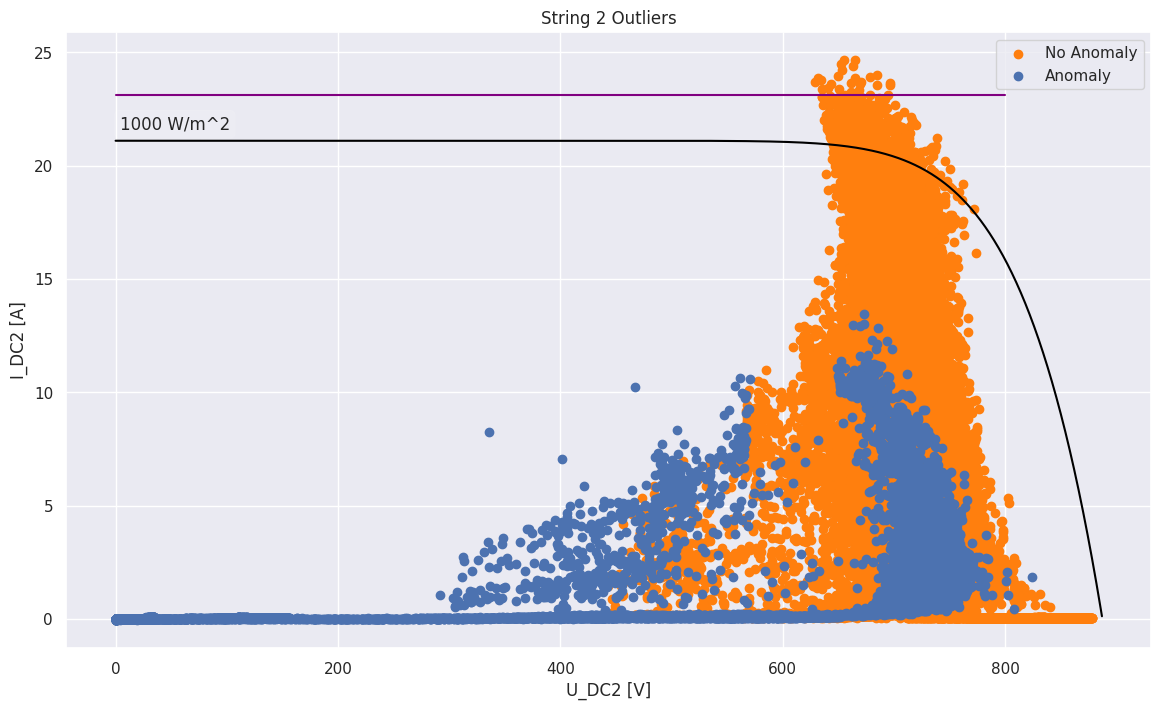

In [298]:
plt.figure(figsize=(14, 8))
x = np.arange(0.01,887.4,1)
y = -7084864.500*np.exp(-11291.87/x)+21.10

plt.plot(x, y, 'r', color='black')
plt.scatter(no_anomaly_ae['U_DC2'], no_anomaly_ae['I_DC2'], label='No Anomaly',color='#ff7f0e')
plt.scatter(anomaly_ae['U_DC2'], anomaly_ae['I_DC2'], label='Anomaly',color='b')
plt.xlabel('U_DC2 [V]')
plt.ylabel('I_DC2 [A]')
plt.legend()
plt.title('String 2 Outliers')

plt.annotate('1000 W/m^2', xy=(0.1, 0.85), xycoords='axes fraction',
             fontsize=12, ha='center', va='center',
             bbox=dict(boxstyle='round', alpha=0.1, facecolor='white'))

upper_limit_idc = 21.1 + 2
lower_limit_idc = 21.1 - 2

upper_idc_xaxis =  np.arange(0,900,100)
upper_idc_yaxis = upper_limit_idc*np.ones(upper_idc_xaxis.shape[0])

lower_idc_xaxis =  np.arange(0,900,100)
lower_idc_yaxis = lower_limit_idc*np.ones(lower_idc_xaxis.shape[0])


plt.plot(upper_idc_xaxis, upper_idc_yaxis, 'r', color='purple')

In [299]:
unknown_2 = ae_df[(ae_df['Anomaly'] == 1) & (ae_df['I_DC2']>=upper_limit_idc)]

In [300]:
index_u2 = unknown_2.index

In [301]:
ae_df.loc[index_u2,'Anomaly_String2'] = 'Unknown'

In [302]:
ae_df[(ae_df['Anomaly_String2'] == 'Unknown')]

,Timestamp,U_DC1,U_DC2,I_DC1,I_DC2,Anomaly,Label,Anomaly_String1,Anomaly_String2,P_DC1,P_DC2


## ETIQUETADO GENERAL

In [303]:
conditions = [
    ((ae_df['Anomaly_String1'] == 'Unknown') | (ae_df['Anomaly_String2'] == 'Unknown')),
    ((ae_df['Anomaly_String1'] == 'Open Circuit') | (ae_df['Anomaly_String2'] == 'Open Circuit')),
    ((ae_df['Anomaly_String1'] == 'Short Circuit') | (ae_df['Anomaly_String2'] == 'Short Circuit')),
    ((ae_df['Anomaly_String1'] == 'Shading') | (ae_df['Anomaly_String2'] == 'Shading'))
]

choices = ['Unknown', 'Open Circuit', 'Short Circuit', 'Shading']

ae_df['Label'] = np.select(conditions, choices, default='No Fault')

In [304]:
no_fault = ae_df[ae_df['Label']=='No Fault']
shading = ae_df[ae_df['Label']=='Shading']
short_circuit = ae_df[ae_df['Label']=='Short Circuit']
open_circuit = ae_df[ae_df['Label']=='Open Circuit']
unknown = ae_df[ae_df['Label']=='Unknown']

<ipython-input-305-7a6b563fd4cb>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(x, y, 'r', color='black')


Text(0.1, 0.85, '1000 W/m^2')

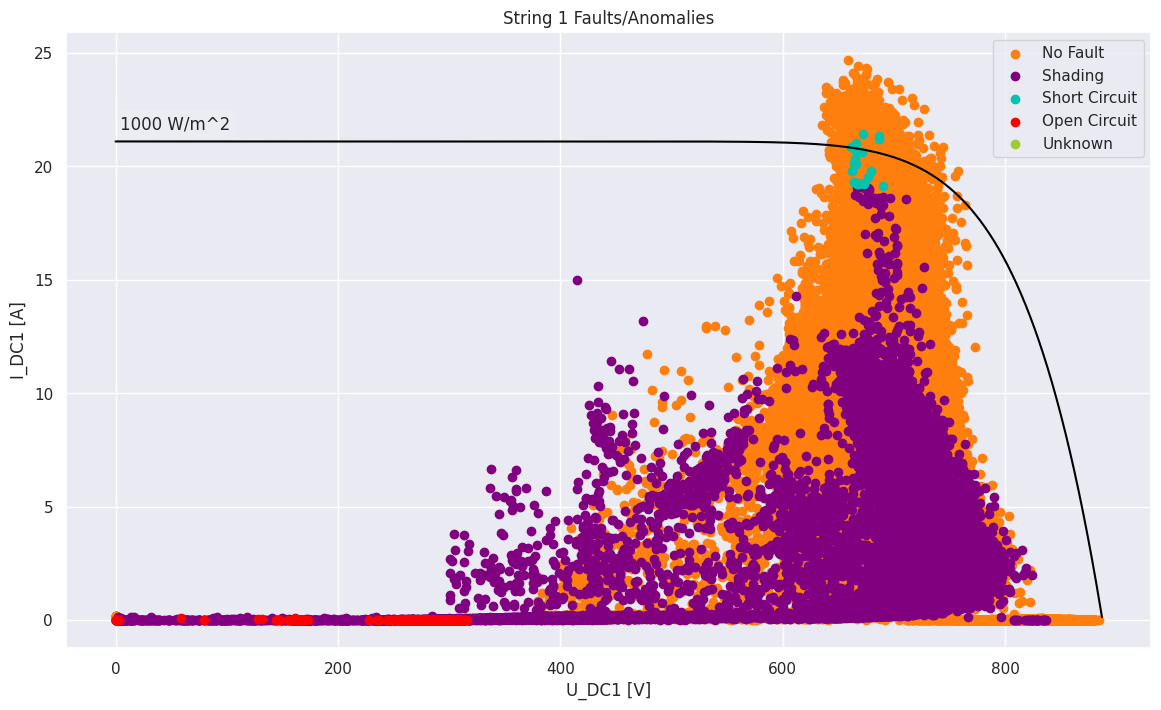

In [305]:
x = np.arange(0.01,887.4,1)
y = -7084864.500*np.exp(-11291.87/x)+21.10

plt.figure(figsize=(14, 8))
plt.plot(x, y, 'r', color='black')
plt.scatter(no_fault['U_DC1'], no_fault['I_DC1'], label='No Fault',color='#ff7f0e')
plt.scatter(shading['U_DC1'], shading['I_DC1'], label='Shading',color='purple')
plt.scatter(short_circuit['U_DC1'], short_circuit['I_DC1'], label='Short Circuit',color= '#06c2ac')
plt.scatter(open_circuit['U_DC1'], open_circuit['I_DC1'], label='Open Circuit',color='red')
plt.scatter(unknown['U_DC1'], unknown['I_DC1'], label='Unknown',color='yellowgreen')
plt.xlabel('U_DC1 [V]')
plt.ylabel('I_DC1 [A]')
plt.legend()
plt.title('String 1 Faults/Anomalies')

plt.annotate('1000 W/m^2', xy=(0.1, 0.85), xycoords='axes fraction',
             fontsize=12, ha='center', va='center',
             bbox=dict(boxstyle='round', alpha=0.1, facecolor='white'))


<ipython-input-306-c01f9a45b9fd>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(x, y, 'r', color='black')


Text(0.1, 0.85, '1000 W/m^2')

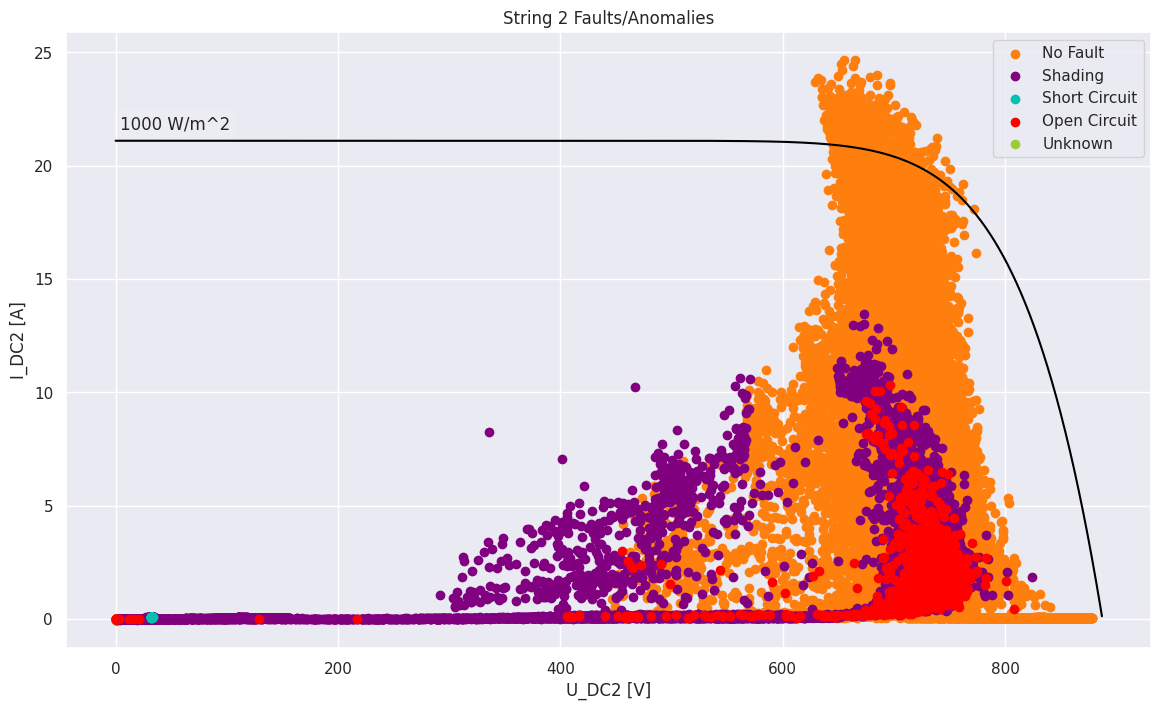

In [306]:
x = np.arange(0.01,887.4,1)
y = -7084864.500*np.exp(-11291.87/x)+21.10

plt.figure(figsize=(14, 8))
plt.plot(x, y, 'r', color='black')
plt.scatter(no_fault['U_DC2'], no_fault['I_DC2'], label='No Fault',color='#ff7f0e')
plt.scatter(shading['U_DC2'], shading['I_DC2'], label='Shading',color='purple')
plt.scatter(short_circuit['U_DC2'], short_circuit['I_DC2'], label='Short Circuit',color= '#06c2ac')
plt.scatter(open_circuit['U_DC2'], open_circuit['I_DC2'], label='Open Circuit',color='red')
plt.scatter(unknown['U_DC2'], unknown['I_DC2'], label='Unknown',color='yellowgreen')
plt.xlabel('U_DC2 [V]')
plt.ylabel('I_DC2 [A]')
plt.legend()
plt.title('String 2 Faults/Anomalies')

plt.annotate('1000 W/m^2', xy=(0.1, 0.85), xycoords='axes fraction',
             fontsize=12, ha='center', va='center',
             bbox=dict(boxstyle='round', alpha=0.1, facecolor='white'))


## ANÁLISIS DE ETIQUETADO

In [307]:
labeled_df = ae_df[['Timestamp','U_DC1','U_DC2','I_DC1','I_DC2','Label']]

<ipython-input-308-772ecc8ae998>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks()/1000)


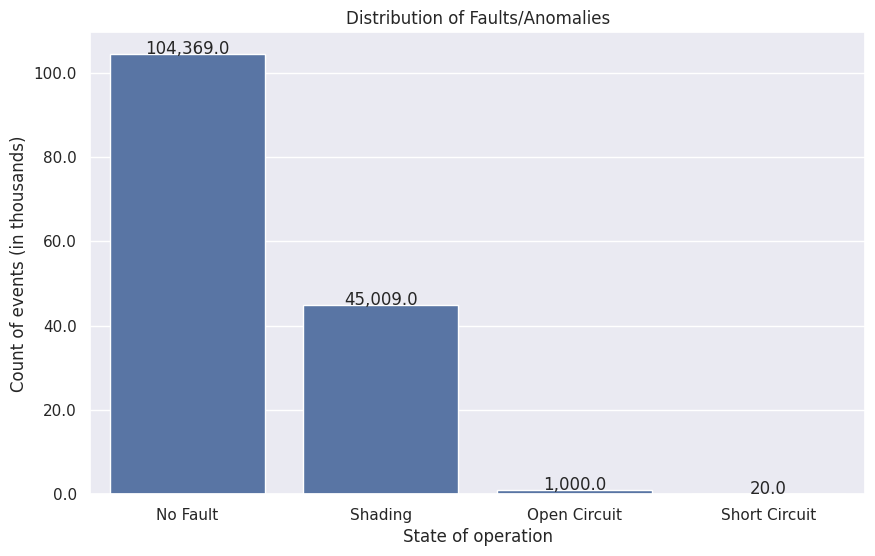

In [308]:
plt.figure(figsize=(10, 6))

# Calculate counts and sort in descending order
order =labeled_df['Label'].value_counts().index
ax = sns.countplot(x='Label',data=labeled_df,order=order)
plt.title('Distribution of Faults/Anomalies')
plt.xlabel('State of operation')
plt.ylabel('Count of events (in thousands)')

ax.set_yticklabels(ax.get_yticks()/1000)

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2),
            y = height+0.2,
            s = '{:,}'.format(height),  # Original value here
            ha = 'center')

plt.show()

In [309]:
order

Index(['No Fault', 'Shading', 'Open Circuit', 'Short Circuit'], dtype='object')

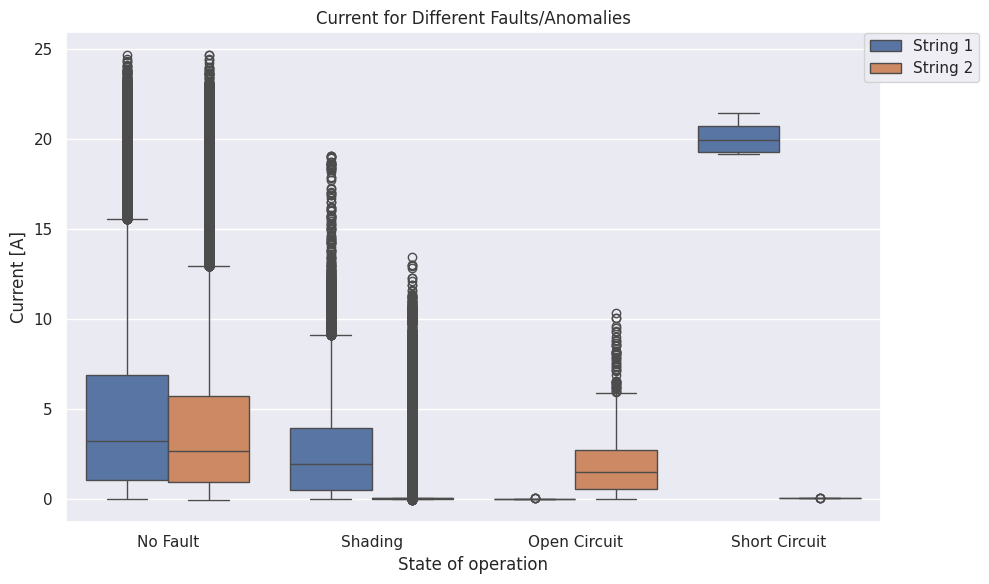

In [310]:
# Create a new dataframe
ae_df_new = pd.concat([
    ae_df[['Label', 'I_DC1']].rename(columns={'I_DC1': 'Current'}).assign(String='String 1'),
    ae_df[['Label', 'I_DC2']].rename(columns={'I_DC2': 'Current'}).assign(String='String 2')
])

plt.figure(figsize=(10, 6))
ax =sns.boxplot(x='Label', y='Current', hue='String', data=ae_df_new)
ax.legend(loc='upper right', bbox_to_anchor=(1.13,1.015))
plt.title('Current for Different Faults/Anomalies')
plt.xlabel('State of operation')
plt.ylabel('Current [A]')

plt.tight_layout()
plt.show()

In [311]:
ae_df_new[(ae_df_new['Label']=='Shading') & (ae_df_new['String']=='String 2')]

,Label,Current,String
15,Shading,0.056,String 2
16,Shading,0.084,String 2
17,Shading,0.122,String 2
157,Shading,0.074,String 2
158,Shading,0.124,String 2
...,...,...,...
150340,Shading,0.062,String 2
150341,Shading,0.122,String 2
150395,Shading,10.250,String 2
150396,Shading,0.080,String 2


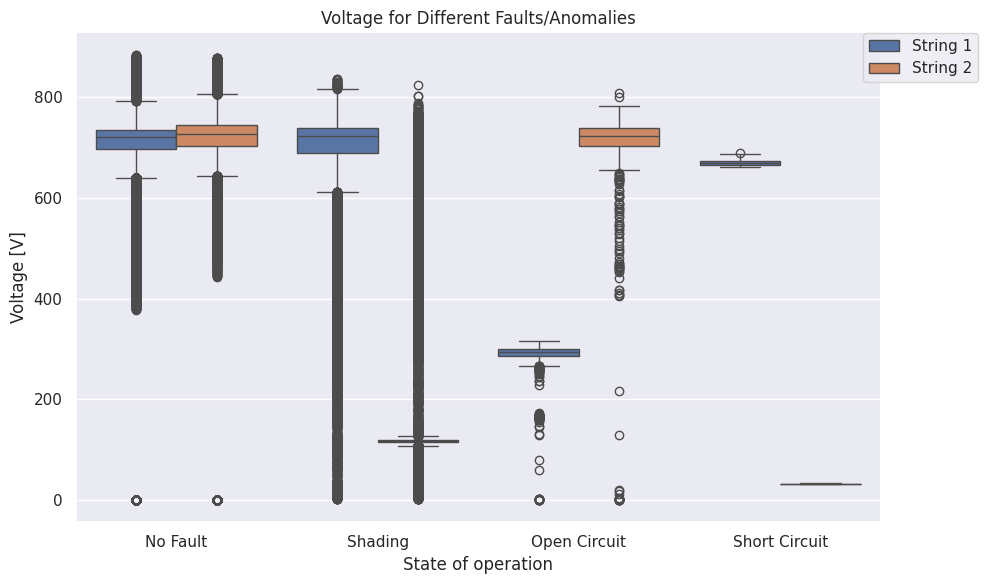

In [312]:
# Create a new dataframe
ae_df_new = pd.concat([
    ae_df[['Label', 'U_DC1']].rename(columns={'U_DC1': 'Voltage'}).assign(String='String 1'),
    ae_df[['Label', 'U_DC2']].rename(columns={'U_DC2': 'Voltage'}).assign(String='String 2')
])

plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Label', y='Voltage', hue='String', data=ae_df_new)
ax.legend(loc='upper right', bbox_to_anchor=(1.13,1.015))
plt.title('Voltage for Different Faults/Anomalies')
plt.xlabel('State of operation')
plt.ylabel('Voltage [V]')

plt.tight_layout()
plt.show()

In [313]:
labeled_df.to_csv('df_with_labels_ae12.csv', sep=';', index=False, encoding='utf-8')